In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs,make_moons
from yellowbrick.cluster import KElbowVisualizer
import time
from matplotlib.colors import ListedColormap
from joblib import dump, load

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# Label = 1 & 0

## K-Means Clustering

In [2]:
df_label_10 = pd.read_csv("../input/enron-clean/enron_clean_V2.csv")

In [3]:
df_label_10.shape

(433074, 54)

In [4]:
df_label_10.head()

Year  Month  Day  Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards                                      Subject_lemma                                         Body_lemma  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic  VBZ  VBD  CD  PRP  VB  VBN  RB  TO  RP  VBG  NNP  VBP  JJ  NNS  IN  DT  CC  JJS  WP  NN  JJR
0  2000     11   16    17            3                    0.9616                     0.226                    0.708                     0.066            0                  0.003281                        0                                             status  status john : I be not really sure what happen...                    0.0                       0.063158                           0.027027                 0.166667                   0.000000            0.000000                     0.000000            0.017204                    0.052632                        0.012067              0.028716                0.055743         0.036036                  0.055743        0.0      0                 0.923077                         11                             5    1    3   2   10   7    2   9   4   2    1    9    8   8    1  12   8   2    1   1  13    0
1  2000     12    8    13            4                    0.5940                     0.074                    0.926                     0.000            0                  0.000729                        0                                re : summer inverse  re : summer inverse I suck - hope you ve make ...                    0.0                       0.089474                           0.054054                 0.000000                   0.055556            0.000000                     0.055556            0.004301                    0.052632                        0.018996              0.000000                0.030508         0.140351                  0.030508        0.0      0                 0.947368                          3                            11    0    1   1    1   4    0   4   1   0    1    0    5   8    3   3   4   2    0   0  15    1
2  2001      5   15    16            1                   -0.3923                     0.036                    0.918                     0.045            0                  0.000547                        0                       the wti bullet swap contract  the wti bullet swap contract hi , follow the e...                    0.0                       0.042105                           0.135135                 0.172414                   0.000000            0.200000                     0.000000            0.004301                    0.052632                        0.062007              0.074792                0.042475         0.088889                  0.042475        0.0      0                 0.775862                          4                             9    1    7  21    6   7    5   4   5   0    8   43    4   6   10   9   9   1    0   1  26    0
3  2000     12   12     7            1                   -0.4767                     0.000                    0.829                     0.171            0                  0.001641                        1  fwd : nytimes.com article : suspend rabbi quit...  fwd : nytimes.com article : suspend rabbi quit...                    0.0                       0.084211                           0.216216                 0.149254                   0.044776            0.111111                     0.044776            0.006452                    0.111842              

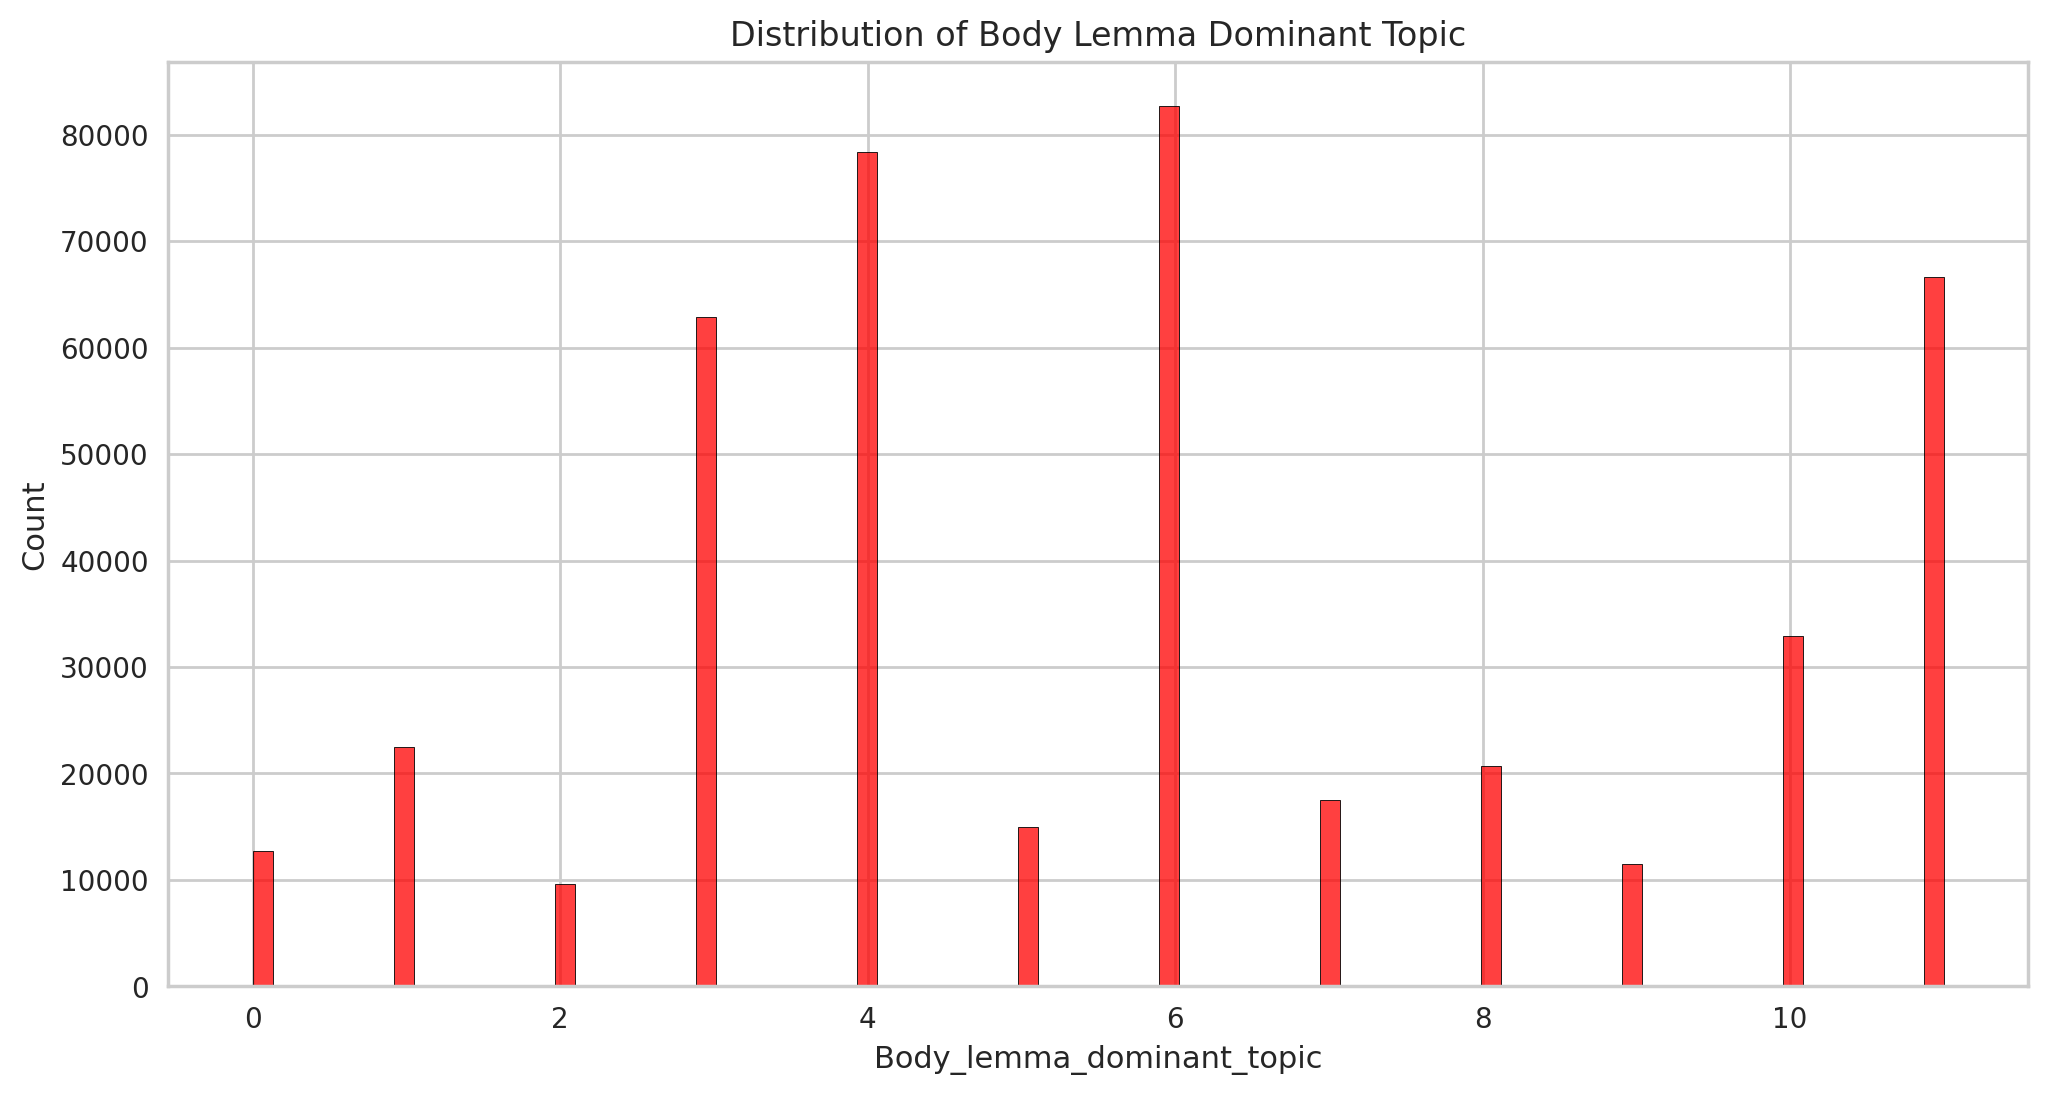

In [5]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df_label_10,x="Body_lemma_dominant_topic",color="red")
plt.title("Distribution of Body Lemma Dominant Topic")
plt.show()

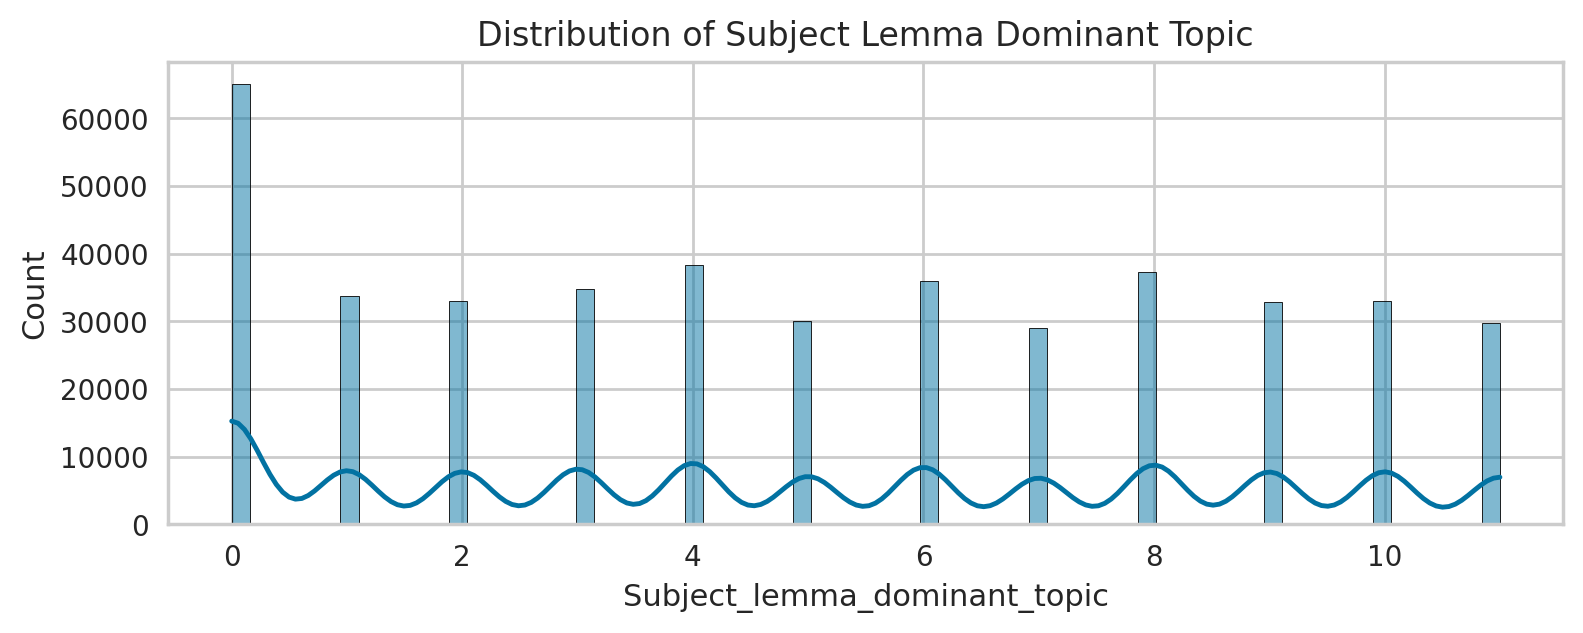

In [6]:
plt.figure(figsize=(9,3),dpi=200)
sns.histplot(data=df_label_10,x="Subject_lemma_dominant_topic",kde=True)
plt.title("Distribution of Subject Lemma Dominant Topic")
plt.show()

In [7]:
pd.DataFrame(df_label_10.Body_lemma_dominant_topic.value_counts()).head()

count
Body_lemma_dominant_topic       
6                          82643
4                          78408
11                         66659
3                          62901
10                         32899

In [8]:
pd.DataFrame(df_label_10.Subject_lemma_dominant_topic.value_counts()).head()

count
Subject_lemma_dominant_topic       
0                             65017
4                             38401
8                             37298
6                             35901
3                             34755

In [9]:
df_label_10 = df_label_10.drop(['Body_lemma', 'Subject_lemma'], axis=1)

In [10]:
scaler = StandardScaler()
df_scaled_label_10 = scaler.fit_transform(df_label_10)

In [11]:
df_scaled_label_10[0]

array([-7.14763714e-01,  1.17928435e+00, -1.08772562e-04,  6.92642320e-01,
        6.07913156e-01,  1.23520333e+00,  1.11508336e+00, -1.32753555e+00,
        8.54862069e-01, -2.03856950e+00, -6.71164713e-01, -6.20482999e-01,
       -1.09548539e-01,  2.95830965e-01, -1.16792661e+00, -1.68829068e-01,
       -7.57253923e-01, -6.33998845e-01, -7.57253923e-01,  1.06799752e-01,
       -4.80861188e-01, -2.56232413e-01, -8.62939978e-01, -1.76914121e-01,
       -5.05906595e-01, -1.76914121e-01, -1.85653306e-01, -7.17650650e-02,
       -2.15409607e-02,  1.57869759e+00, -9.25530734e-03, -1.94592729e-01,
        1.29841691e-01, -1.76825967e-01,  6.43854364e-01,  1.49654675e-01,
       -4.02767654e-02,  6.27362373e-01,  1.12359803e-01,  1.52116071e+00,
       -1.41355242e-01, -2.17219478e-01,  9.27045413e-01,  5.80252116e-02,
       -2.72929958e-01,  2.05985853e-02, -2.15124697e-02, -1.23125842e-01,
        9.18651223e-01,  7.70643490e-01, -7.74169640e-02, -1.94042253e-01])

In [12]:
df_scaled_label_10 = pd.DataFrame(df_scaled_label_10,columns=df_label_10.columns)
df_scaled_label_10.head()

Year     Month       Day      Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count     Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic       VBZ       VBD        CD       PRP        VB       VBN        RB        TO        RP       VBG       NNP       VBP        JJ       NNS        IN        DT        CC       JJS        WP        NN       JJR
0 -0.714764  1.179284 -0.000109  0.692642     0.607913                  1.235203                  1.115083                -1.327536                  0.854862     -2.03857                 -0.671165                -0.620483              -0.109549                       0.295831                          -1.167927                -0.168829                  -0.757254           -0.633999                    -0.757254            0.106800                   -0.480861                       -0.256232             -0.862940               -0.176914        -0.505907                 -0.176914  -0.185653 -0.071765                -0.021541                   1.578698                     -0.009255 -0.194593  0.129842 -0.176826  0.643854  0.149655 -0.040277  0.627362  0.112360  1.521161 -0.141355 -0.217219  0.927045  0.058025 -0.272930  0.020599 -0.021512 -0.123126  0.918651  0.770643 -0.077417 -0.194042
1 -0.714764  1.451602 -0.910381 -0.131001     1.264966                  0.417442                 -0.314503                 0.491158                 -0.474103     -2.03857                 -0.680742                -0.620483              -0.109549                       1.204708                          -0.798378                -1.111391                  -0.007663           -0.633999                    -0.007663           -0.250283                   -0.480861                        0.357469             -1.239227               -0.612425         0.690777                 -0.612425  -0.185653 -0.071765                 0.184941                  -0.913125                      1.666661 -0.342754 -0.120426 -0.226874 -0.384157 -0.108743 -0.388260  0.068028 -0.274282 -0.299213 -0.141355 -0.326918  0.414849  0.058025 -0.141681 -0.288243 -0.195115 -0.123126 -0.192753 -0.272997 -0.030872  0.522641
2  0.455116 -0.454620 -0.113893  0.486731    -0.706193                 -1.776676                 -0.671900                 0.424417                  0.432010     -2.03857                 -0.681426                -0.620483              -0.109549                      -0.431270                           0.310267                -0.136327                  -0.757254            0.355816                    -0.757254           -0.250283                   -0.480861                        4.166647             -0.259176               -0.405909         0.100413                 -0.405909  -0.185653 -0.071765                -1.272892                  -0.601647                      1.108022 -0.194593  0.630376  0.774090  0.186961  0.149655  0.481698  0.068028  0.241240 -0.299213  1.148873  0.197196  0.244117 -0.039474  0.317691 -0.082349  0.021888 -0.230259 -0.192753  0.770643  0.225123 -0.194042
3 -0.714764  1.451602 -0.455245 -1.366466    -0.706193                 -1.964432                 -1.010486                -0.318077                  2.969124     -2.03857                 -0.677322                 1.611648              -0.109549                       1.022932                           1.418912                -0.267306                  -0.153106           -0.084102                    -0.153106           -0.190769

In [13]:
from sklearn.cluster import KMeans

# Perform K-means clustering
k_means_model = KMeans(n_clusters=5, random_state=0).fit(df_scaled_label_10)

# Get the feature names from the DataFrame
feature_names = df_scaled_label_10.columns

# For each cluster...
for i in range(k_means_model.n_clusters):
    # Get the centroid of the cluster
    centroid = k_means_model.cluster_centers_[i]
    
    # Get the top 10 features for this cluster
    top10 = centroid.argsort()[-10:]
    
    # Print the features
    print(f"Top features for cluster {i}:")
    for j in top10:
        print(feature_names[j])


Top features for cluster 0:
Subject_special_chars_ratio
Subject_punctuation_ratio
Subject_uppercase_ratio
Hour
Unique-Mails-From-Sender
Body_lemma_dominant_topic
Contains-Reply-Forwards
sentiment_score_positive
Sender-Type
Body_lexical_complexity
Top features for cluster 1:
Subject_special_chars_ratio
Subject_punctuation_ratio
Subject_typo_ratio
Unique-Mails-From-Sender
sentiment_score_neutral
Body_uppercase_ratio
Body_median_chars_per_word
Body_typo_ratio
Body_punctuation_ratio
Body_special_chars_ratio
Top features for cluster 2:
NNP
Body_num_sentences
CC
TO
DT
VB
NNS
JJ
IN
NN
Top features for cluster 3:
IN
CC
DT
VBN
RB
TO
VBP
sentiment_score_compound
VB
PRP
Top features for cluster 4:
RB
TO
NNS
VBZ
DT
Body_num_sentences
NN
JJ
IN
VBD


In [14]:
ssd = []

for k in range(1,6):
    model = KMeans(n_clusters=k)
    model.fit(df_label_10)
    
    ssd.append(model.inertia_) ## SSD Point to cluster centers

ssd

[5110625978.046506,
 2250582953.4437428,
 1536722967.606979,
 1236824676.0795908,
 1074560502.6879232]

In [15]:
pd.Series(ssd).diff()

0             NaN
1   -2.860043e+09
2   -7.138600e+08
3   -2.998983e+08
4   -1.622642e+08
dtype: float64

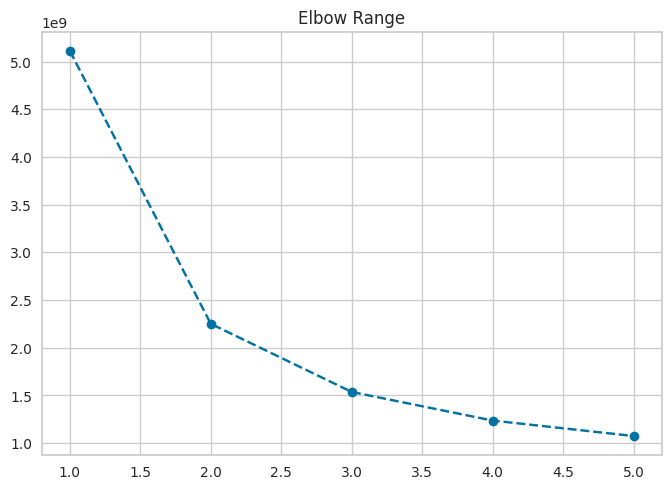

In [16]:
plt.plot(range(1,6),ssd,"o--")
plt.title("Elbow Range")
plt.show()

In [17]:
cluster_labels = k_means_model.predict(df_scaled_label_10) #we can also do that with fit_predict() method.

In [18]:
cluster_labels

array([3, 0, 3, ..., 3, 3, 1], dtype=int32)

In [19]:
df_label_10["Cluster"] = cluster_labels

In [20]:
df_label_10.head()

Year  Month  Day  Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic  VBZ  VBD  CD  PRP  VB  VBN  RB  TO  RP  VBG  NNP  VBP  JJ  NNS  IN  DT  CC  JJS  WP  NN  JJR  Cluster
0  2000     11   16    17            3                    0.9616                     0.226                    0.708                     0.066            0                  0.003281                        0                    0.0                       0.063158                           0.027027                 0.166667                   0.000000            0.000000                     0.000000            0.017204                    0.052632                        0.012067              0.028716                0.055743         0.036036                  0.055743        0.0      0                 0.923077                         11                             5    1    3   2   10   7    2   9   4   2    1    9    8   8    1  12   8   2    1   1  13    0        3
1  2000     12    8    13            4                    0.5940                     0.074                    0.926                     0.000            0                  0.000729                        0                    0.0                       0.089474                           0.054054                 0.000000                   0.055556            0.000000                     0.055556            0.004301                    0.052632                        0.018996              0.000000                0.030508         0.140351                  0.030508        0.0      0                 0.947368                          3                            11    0    1   1    1   4    0   4   1   0    1    0    5   8    3   3   4   2    0   0  15    1        0
2  2001      5   15    16            1                   -0.3923                     0.036                    0.918                     0.045            0                  0.000547                        0                    0.0                       0.042105                           0.135135                 0.172414                   0.000000            0.200000                     0.000000            0.004301                    0.052632                        0.062007              0.074792                0.042475         0.088889                  0.042475        0.0      0                 0.775862                          4                             9    1    7  21    6   7    5   4   5   0    8   43    4   6   10   9   9   1    0   1  26    0        3
3  2000     12   12     7            1                   -0.4767                     0.000                    0.829                     0.171            0                  0.001641                        1                    0.0                       0.084211                           0.216216                 0.149254                   0.044776            0.111111                     0.044776            0.006452                    0.111842                        0.004301              0.076923                0.117949         0.310345                  0.117949        0.0      0                 0.617647                          2                             5    0    1   1    0   1    1   0   1   0    0   10    0   2    0   1   0   0    0   0  10    0        1
4  2001      5   15     6            1                   -0.0772                     0.058                    0.893                     0.050            0         

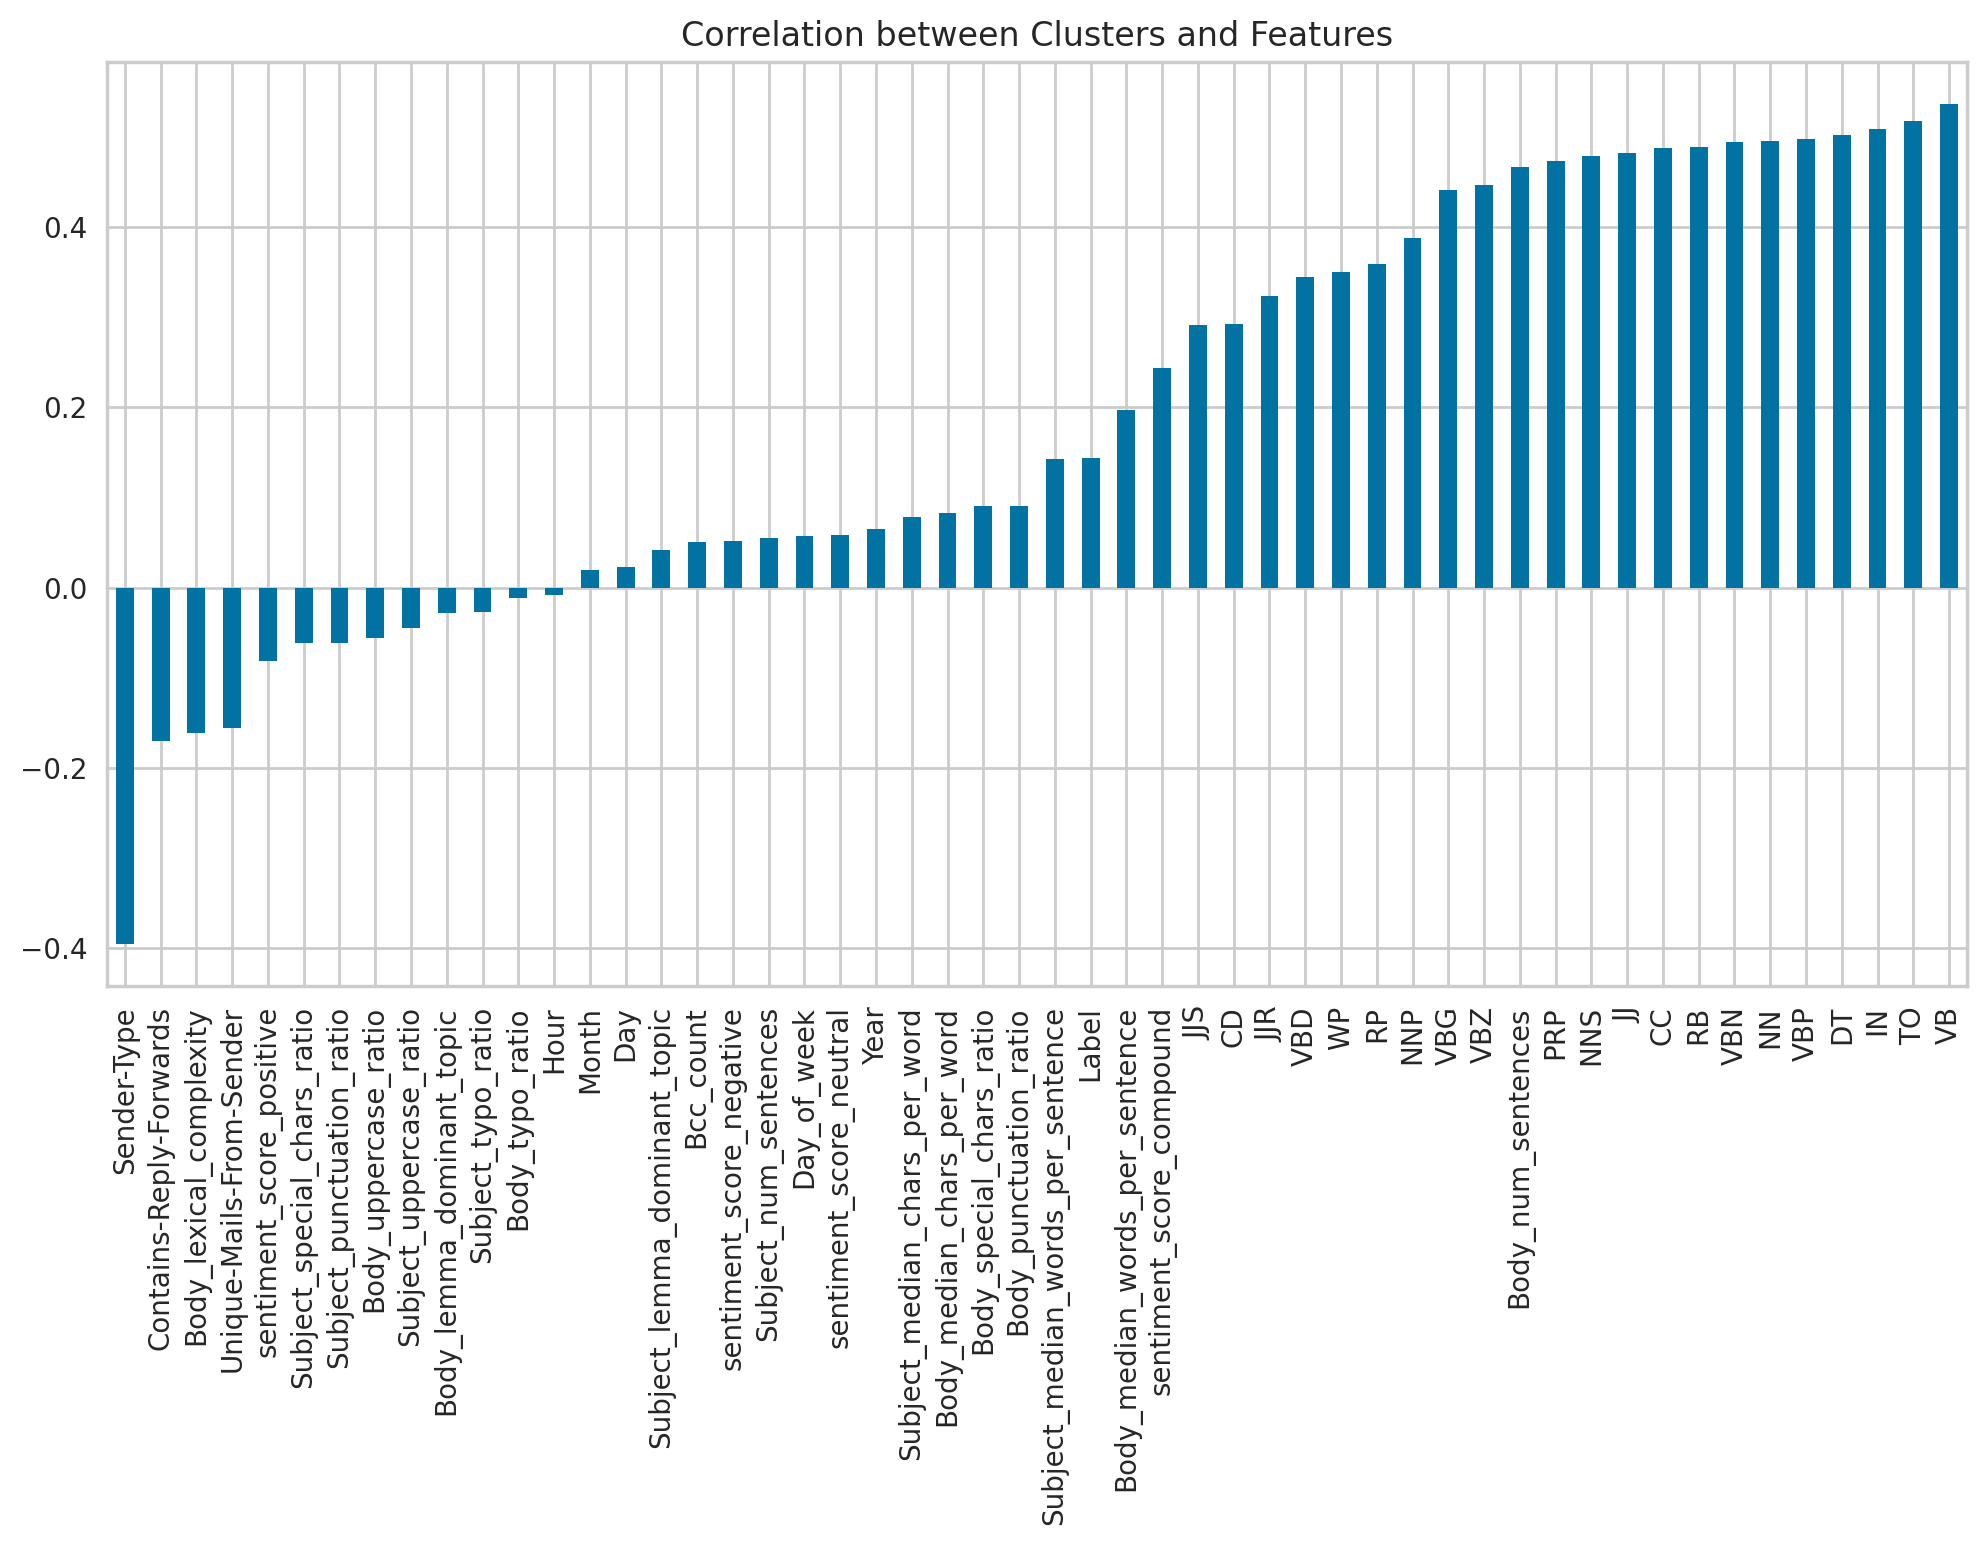

In [21]:
plt.figure(figsize=(12,6),dpi=200)
df_label_10.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

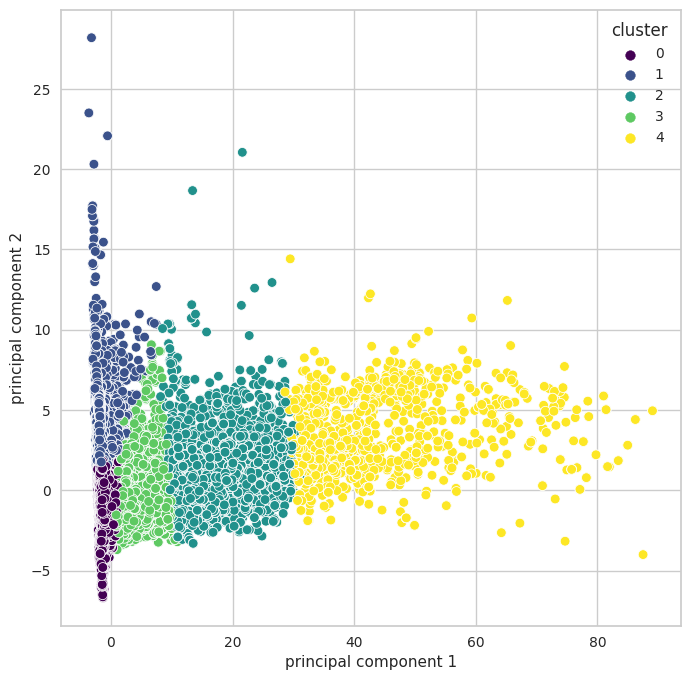

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled_label_10)

# Create a DataFrame with the two components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Concatenate the clusters labels to the DataFrame
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':k_means_model.labels_})], axis = 1)

# Plot the clusters
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf, palette="viridis")
plt.show()


## Hierarchical Clustering

In [23]:
df_label_10_2 = pd.read_csv("../input/enron-clean/enron_clean_V2.csv")

In [24]:
df_label_10_2.Label.value_counts()

Label
0    430855
1      2219
Name: count, dtype: int64

In [25]:
df_label_10_2 = df_label_10_2.drop(["Subject_lemma", "Body_lemma"],axis=1)

In [26]:
df_label_10_2.head()

Year  Month  Day  Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic  VBZ  VBD  CD  PRP  VB  VBN  RB  TO  RP  VBG  NNP  VBP  JJ  NNS  IN  DT  CC  JJS  WP  NN  JJR
0  2000     11   16    17            3                    0.9616                     0.226                    0.708                     0.066            0                  0.003281                        0                    0.0                       0.063158                           0.027027                 0.166667                   0.000000            0.000000                     0.000000            0.017204                    0.052632                        0.012067              0.028716                0.055743         0.036036                  0.055743        0.0      0                 0.923077                         11                             5    1    3   2   10   7    2   9   4   2    1    9    8   8    1  12   8   2    1   1  13    0
1  2000     12    8    13            4                    0.5940                     0.074                    0.926                     0.000            0                  0.000729                        0                    0.0                       0.089474                           0.054054                 0.000000                   0.055556            0.000000                     0.055556            0.004301                    0.052632                        0.018996              0.000000                0.030508         0.140351                  0.030508        0.0      0                 0.947368                          3                            11    0    1   1    1   4    0   4   1   0    1    0    5   8    3   3   4   2    0   0  15    1
2  2001      5   15    16            1                   -0.3923                     0.036                    0.918                     0.045            0                  0.000547                        0                    0.0                       0.042105                           0.135135                 0.172414                   0.000000            0.200000                     0.000000            0.004301                    0.052632                        0.062007              0.074792                0.042475         0.088889                  0.042475        0.0      0                 0.775862                          4                             9    1    7  21    6   7    5   4   5   0    8   43    4   6   10   9   9   1    0   1  26    0
3  2000     12   12     7            1                   -0.4767                     0.000                    0.829                     0.171            0                  0.001641                        1                    0.0                       0.084211                           0.216216                 0.149254                   0.044776            0.111111                     0.044776            0.006452                    0.111842                        0.004301              0.076923                0.117949         0.310345                  0.117949        0.0      0                 0.617647                          2                             5    0    1   1    0   1    1   0   1   0    0   10    0   2    0   1   0   0    0   0  10    0
4  2001      5   15     6            1                   -0.0772                     0.058                    0.893                     0.050            0                  0.064163                        0   

In [27]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

X = df_label_10_2.drop("Label", axis=1)
y = df_label_10_2["Label"]

undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)

In [28]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_under)
X_scaled[:5]

array([[0.83333333, 0.90909091, 0.7       , 0.60869565, 0.33333333,
        0.94785829, 0.286     , 0.714     , 0.        , 1.        ,
        1.        , 1.        , 0.        , 0.08641975, 0.1       ,
        0.06666667, 0.06666667, 0.        , 0.06666667, 0.00898204,
        0.19047619, 0.03588517, 0.06240673, 0.10487528, 0.        ,
        0.10487528, 0.        , 1.        , 0.90909091, 0.27272727,
        0.        , 0.        , 0.        , 0.01923077, 0.02030457,
        0.        , 0.        , 0.01273885, 0.        , 0.00925926,
        0.00234192, 0.01265823, 0.00274725, 0.00282486, 0.00511945,
        0.00195312, 0.00490196, 0.        , 0.        , 0.00586166,
        0.        ],
       [0.91666667, 0.09090909, 0.6       , 0.65217391, 0.16666667,
        0.73819055, 0.08      , 0.888     , 0.032     , 1.        ,
        0.0133066 , 1.        , 0.        , 0.04938272, 0.4       ,
        0.19565217, 0.06521739, 0.33333333, 0.06521739, 0.00898204,
        0.28571429, 0.07296

In [29]:
df_scaled_label_10_2  = pd.DataFrame(X_scaled,columns=X.columns)

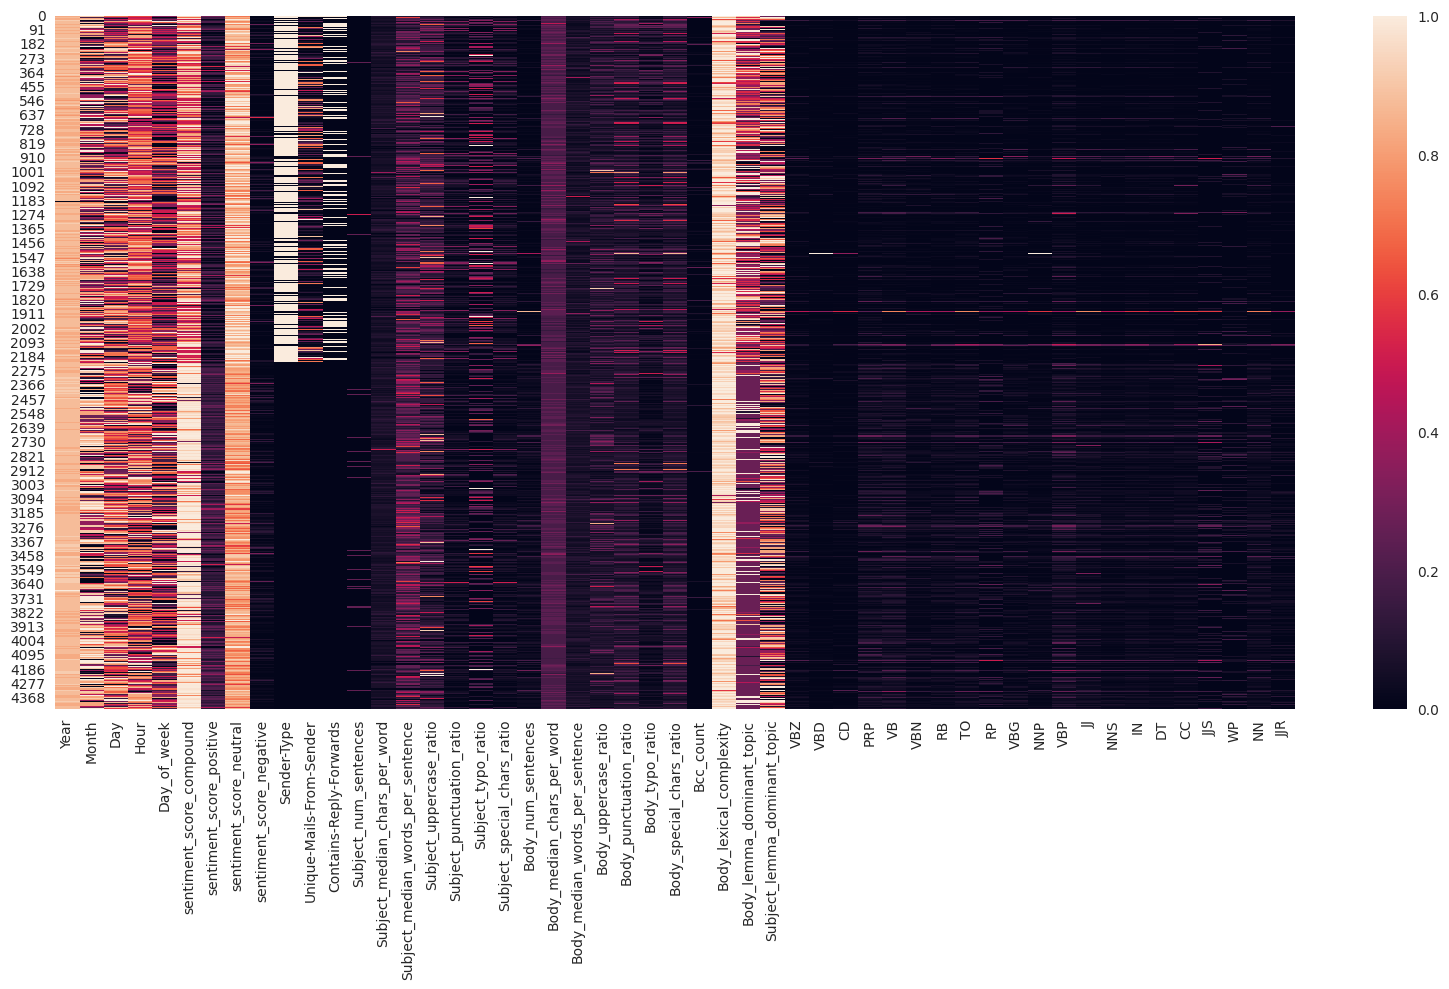

In [30]:
plt.figure(figsize=(20,9))
sns.heatmap(df_scaled_label_10_2)
plt.show()

<Figure size 2000x900 with 0 Axes>

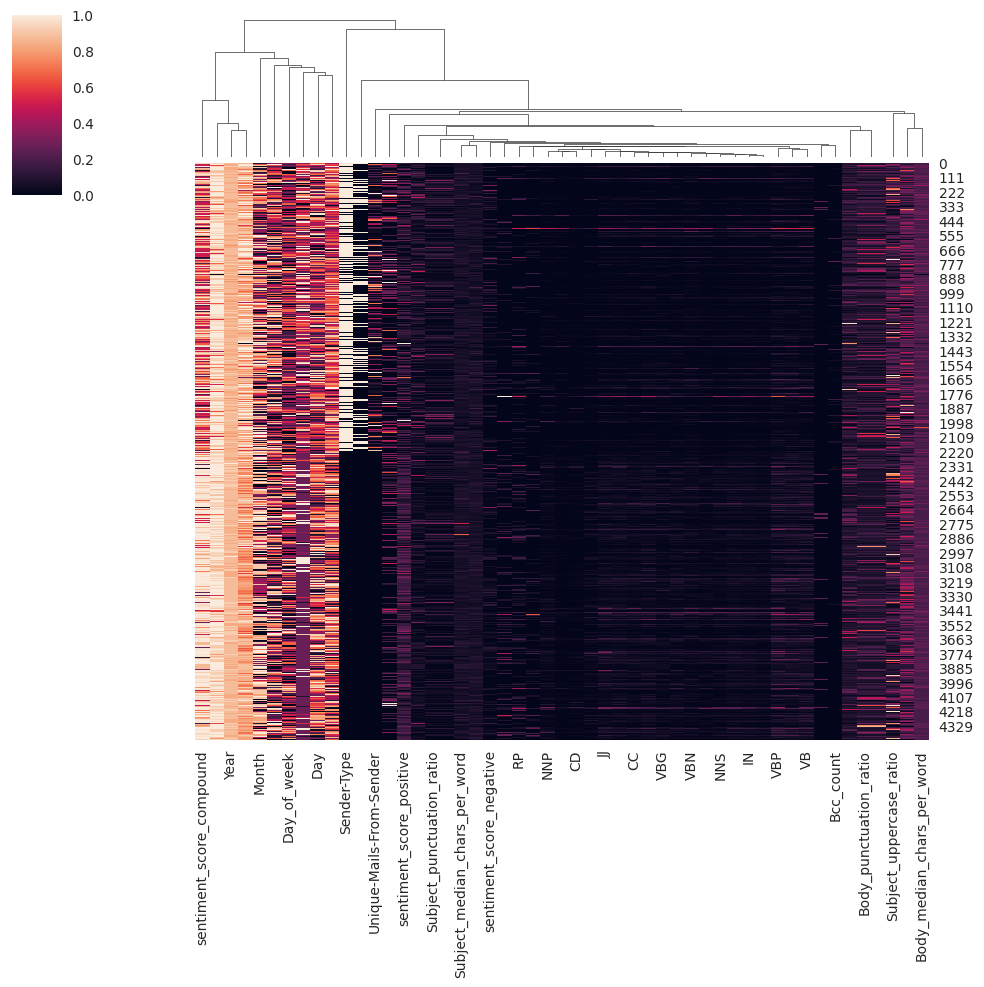

In [31]:
plt.figure(figsize=(20,9))
sns.clustermap(df_scaled_label_10_2,row_cluster=False)
plt.show()

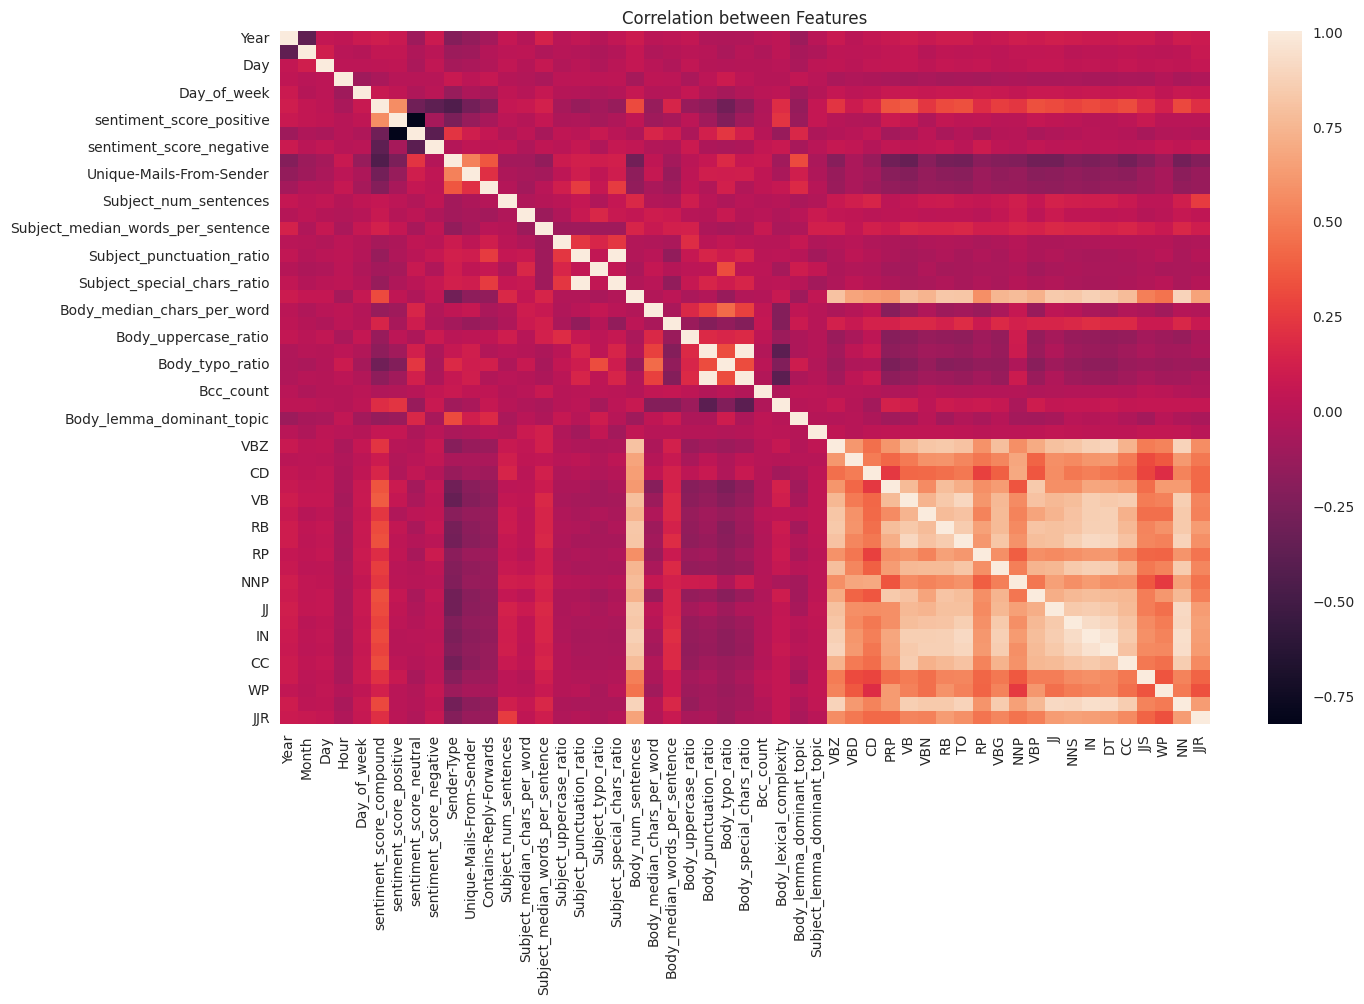

In [32]:
plt.figure(figsize=(15,9))
sns.heatmap(df_scaled_label_10_2.corr())
plt.title("Correlation between Features")
plt.show()

In [33]:
hier_model = AgglomerativeClustering(n_clusters=5,affinity="euclidean") #distance_threshold is also important.

In [34]:
cluster_labels = hier_model.fit_predict(df_scaled_label_10_2)

In [35]:
cluster_labels[:20]

array([2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 0, 3])

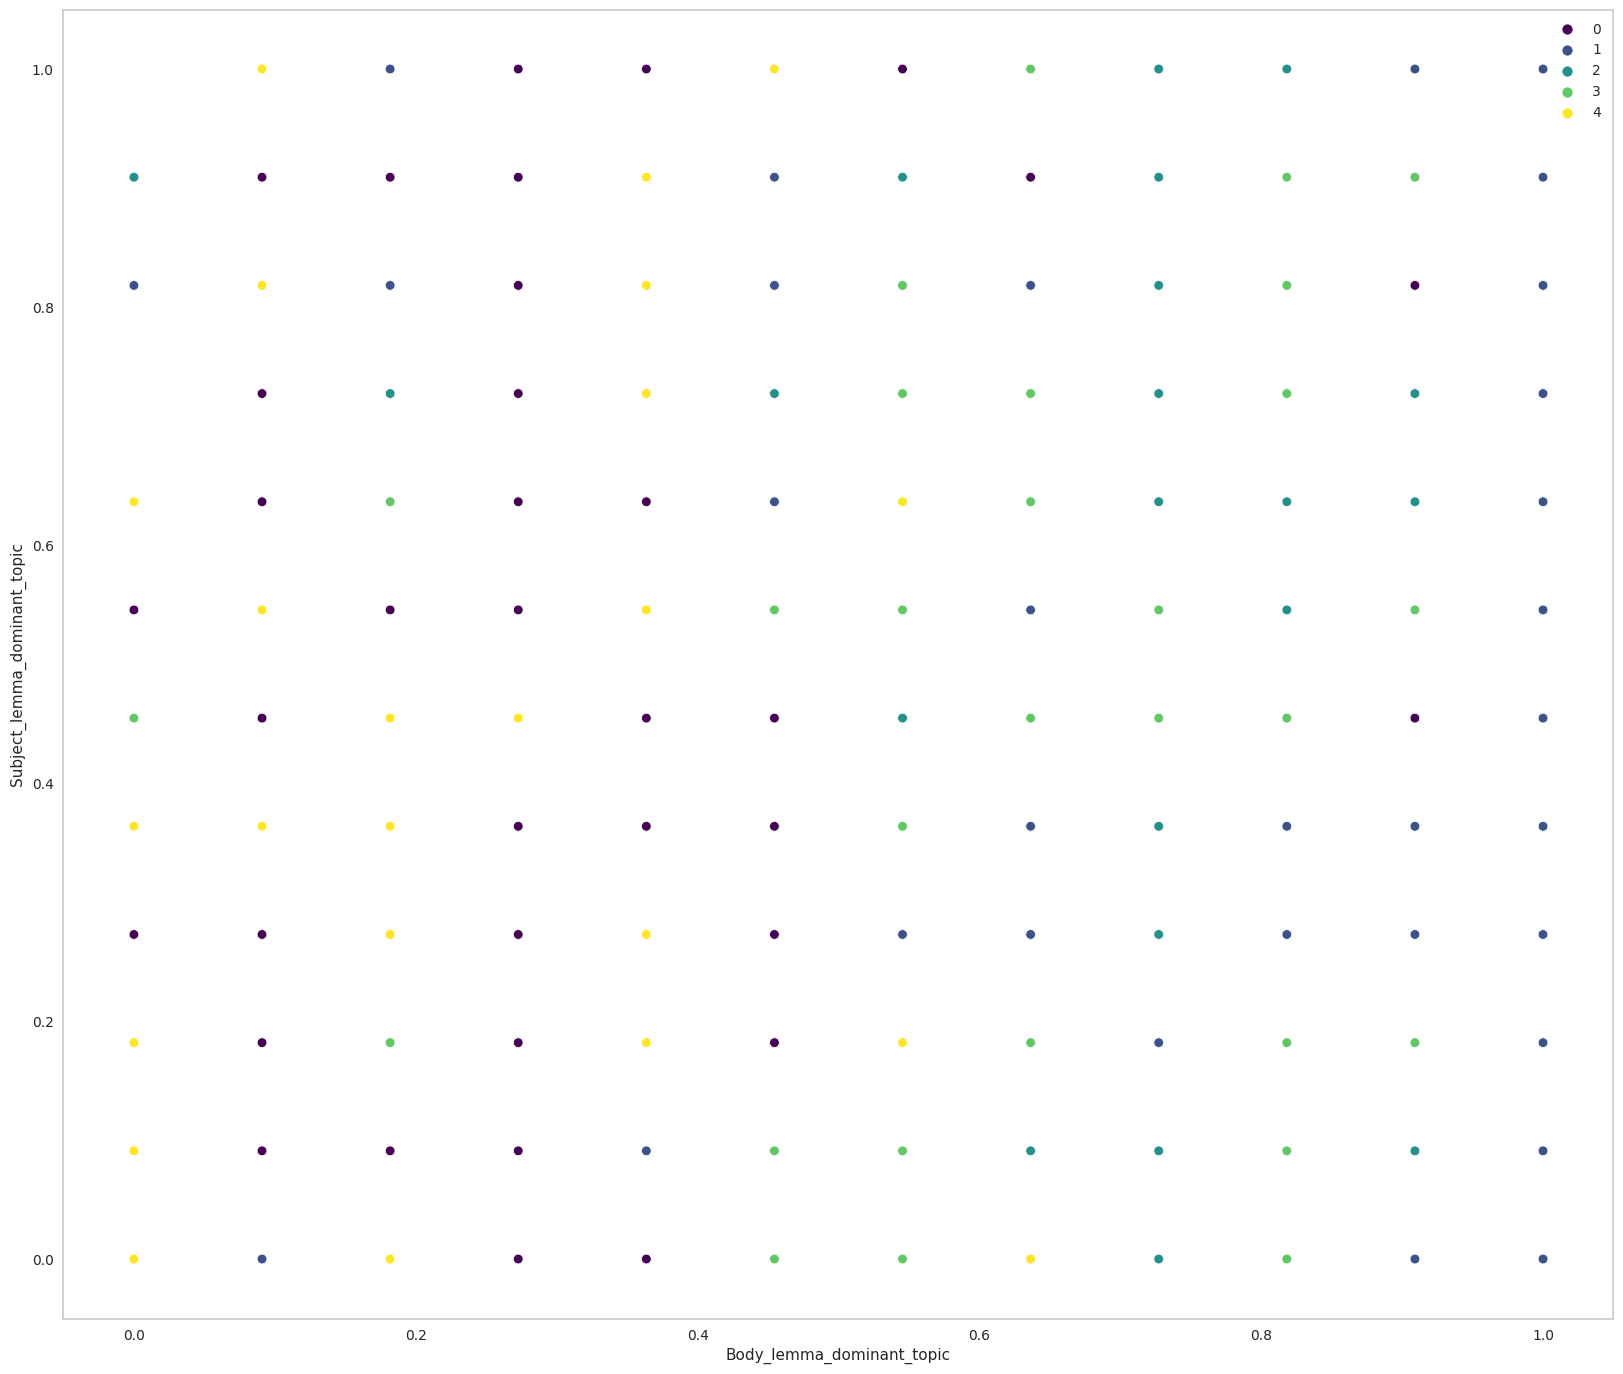

In [36]:
plt.figure(figsize=(20,17))
sns.scatterplot(data=df_scaled_label_10_2,x="Body_lemma_dominant_topic",y="Subject_lemma_dominant_topic",hue=cluster_labels,palette="viridis")
plt.grid(False)

In [37]:
linkage_matrix = hierarchy.linkage(hier_model.children_)
linkage_matrix

array([[1.46000000e+02, 3.63000000e+02, 1.41421356e+00, 2.00000000e+00],
       [2.55000000e+02, 3.13000000e+02, 1.41421356e+00, 2.00000000e+00],
       [2.53000000e+02, 3.43000000e+02, 1.41421356e+00, 2.00000000e+00],
       ...,
       [4.25000000e+03, 8.86900000e+03, 3.43796451e+02, 4.43200000e+03],
       [4.37900000e+03, 8.87000000e+03, 3.97343680e+02, 4.43300000e+03],
       [8.86400000e+03, 8.87100000e+03, 6.04334345e+02, 4.43700000e+03]])

In [38]:
linkage_df = pd.DataFrame(linkage_matrix,columns=["First Point","Second Point","Distance Between Points","How many points are there in the cluster?"])
linkage_df.head()

First Point  Second Point  Distance Between Points  How many points are there in the cluster?
0        146.0         363.0                 1.414214                                        2.0
1        255.0         313.0                 1.414214                                        2.0
2        253.0         343.0                 1.414214                                        2.0
3        102.0         254.0                 1.414214                                        2.0
4        393.0        4440.0                 1.414214                                        3.0

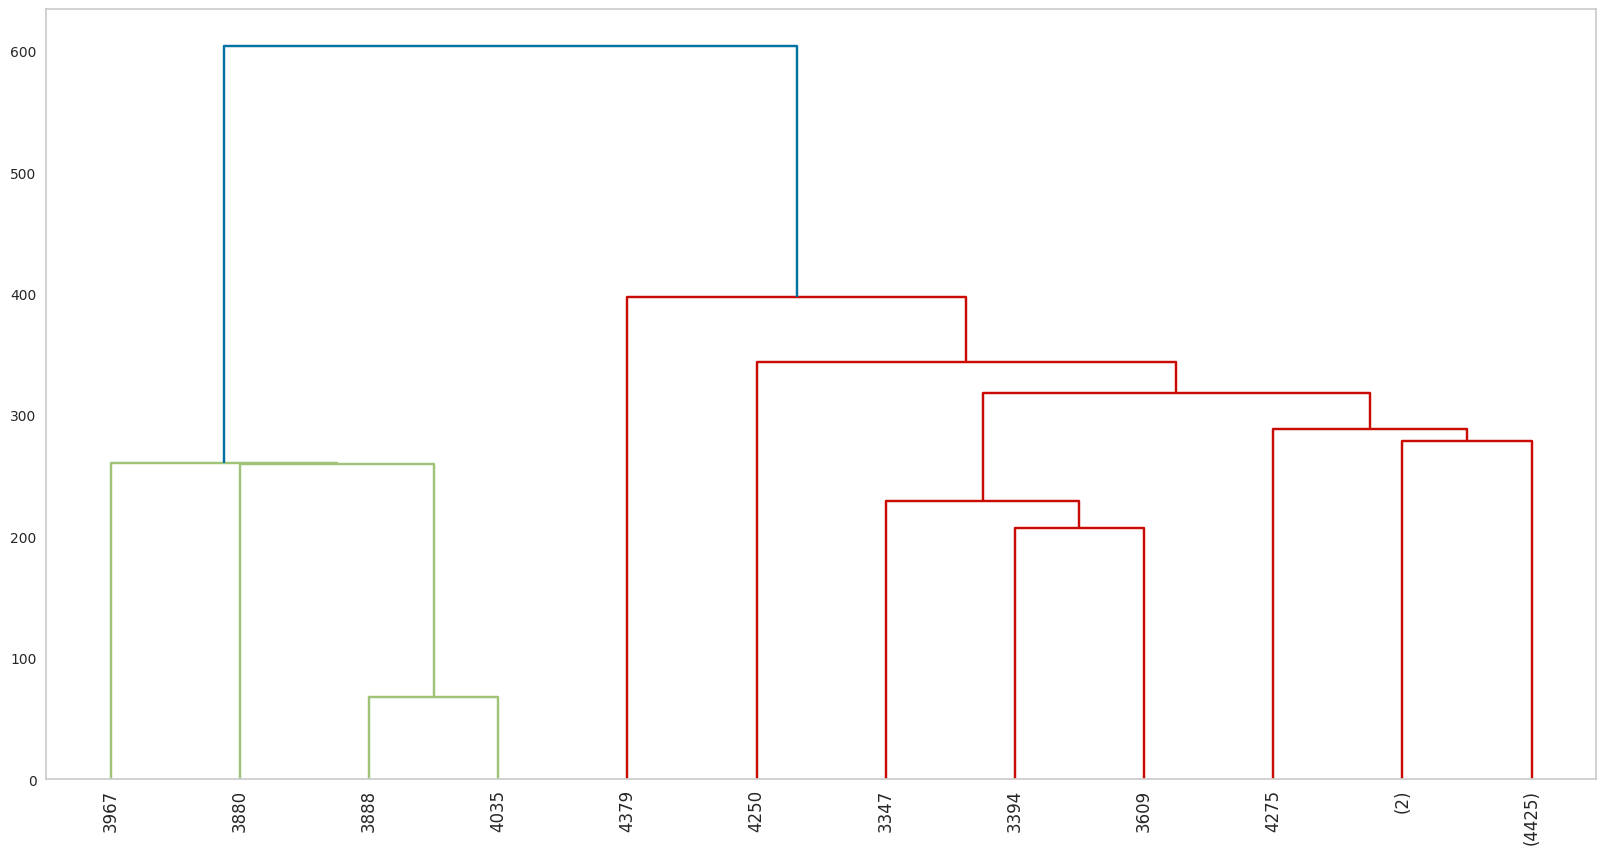

In [39]:
plt.figure(figsize=(20,10))
dendrogram = hierarchy.dendrogram(linkage_matrix,truncate_mode="level",p=5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

# Label = 1

## K-Means Clustering

In [40]:
df_label_1 = pd.read_csv("../input/enron-clean/enron_clean_V2.csv")

In [41]:
df_label_1 = df_label_1[df_label_1['Label'] == 1]

In [42]:
df_label_1.shape

(2219, 54)

In [43]:
df_label_1.head()

Year  Month  Day  Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards                                      Subject_lemma                                         Body_lemma  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic  VBZ  VBD  CD  PRP  VB  VBN  RB  TO  RP  VBG  NNP  VBP  JJ  NNS  IN  DT  CC  JJS  WP  NN  JJR
18  2000     12   11    19            0                    0.9370                     0.127                    0.857                     0.016            0                  0.000547                        0                     amazon.com password assistance  amazon.com password assistance greeting from a...                    0.0                       0.105263                           0.081081                 0.100000                   0.033333            0.000000                     0.033333            0.019355                    0.052632                        0.014516              0.036765                0.039216         0.020548                  0.039216        0.0      1                 0.952381                          3                             9    3    2   2    8  16    4   3   8   0    8   19    2   8    3  12  12   2    0   0  22    0
24  2000     11   14    20            1                    0.9637                     0.155                    0.831                     0.014            0                  0.000182                        0                                     bank wire wsex  bank wire wsex dear mr .. lavorato , the $ 150...                    0.0                       0.042105                           0.081081                 0.000000                   0.000000            0.333333                     0.000000            0.015054                    0.052632                        0.018683              0.080963                0.107221         0.042254                  0.107221        0.0      1                 1.000000                          4                             5    3    2   3    5   7    5   3   5   0    2   34    4   8    7  18  12   1    1   0  18    0
47  2001     10   21    12            6                    0.9682                     0.200                    0.693                     0.107            0                  0.000182                        0  do you owe the irs money ? \n                 ...  do you owe the irs money ? [ 2a994 ] have tax ...                    0.0                       0.031579                           0.189189                 0.047619                   0.035714            0.142857                     0.035714            0.027957                    0.052632                        0.016743              0.054157                0.026697         0.009091                  0.026697        0.0      1                 1.000000                         11                             3    4    1   3   14  17    5   8   7   2    1   32    7  12   14  15  14   9    0   0  38    2
59  2001     10   28     9            6                    0.8930                     0.088                    0.891                     0.021            0                  0.000729                        0                               protect your privacy  protect your privacy ! [ ] ( < url > ) * * sur...                    0.0                       0.073684                           0.081081                 0.100000                   0.000000            0.000000                     0.000000            0.027957                    0.052632          

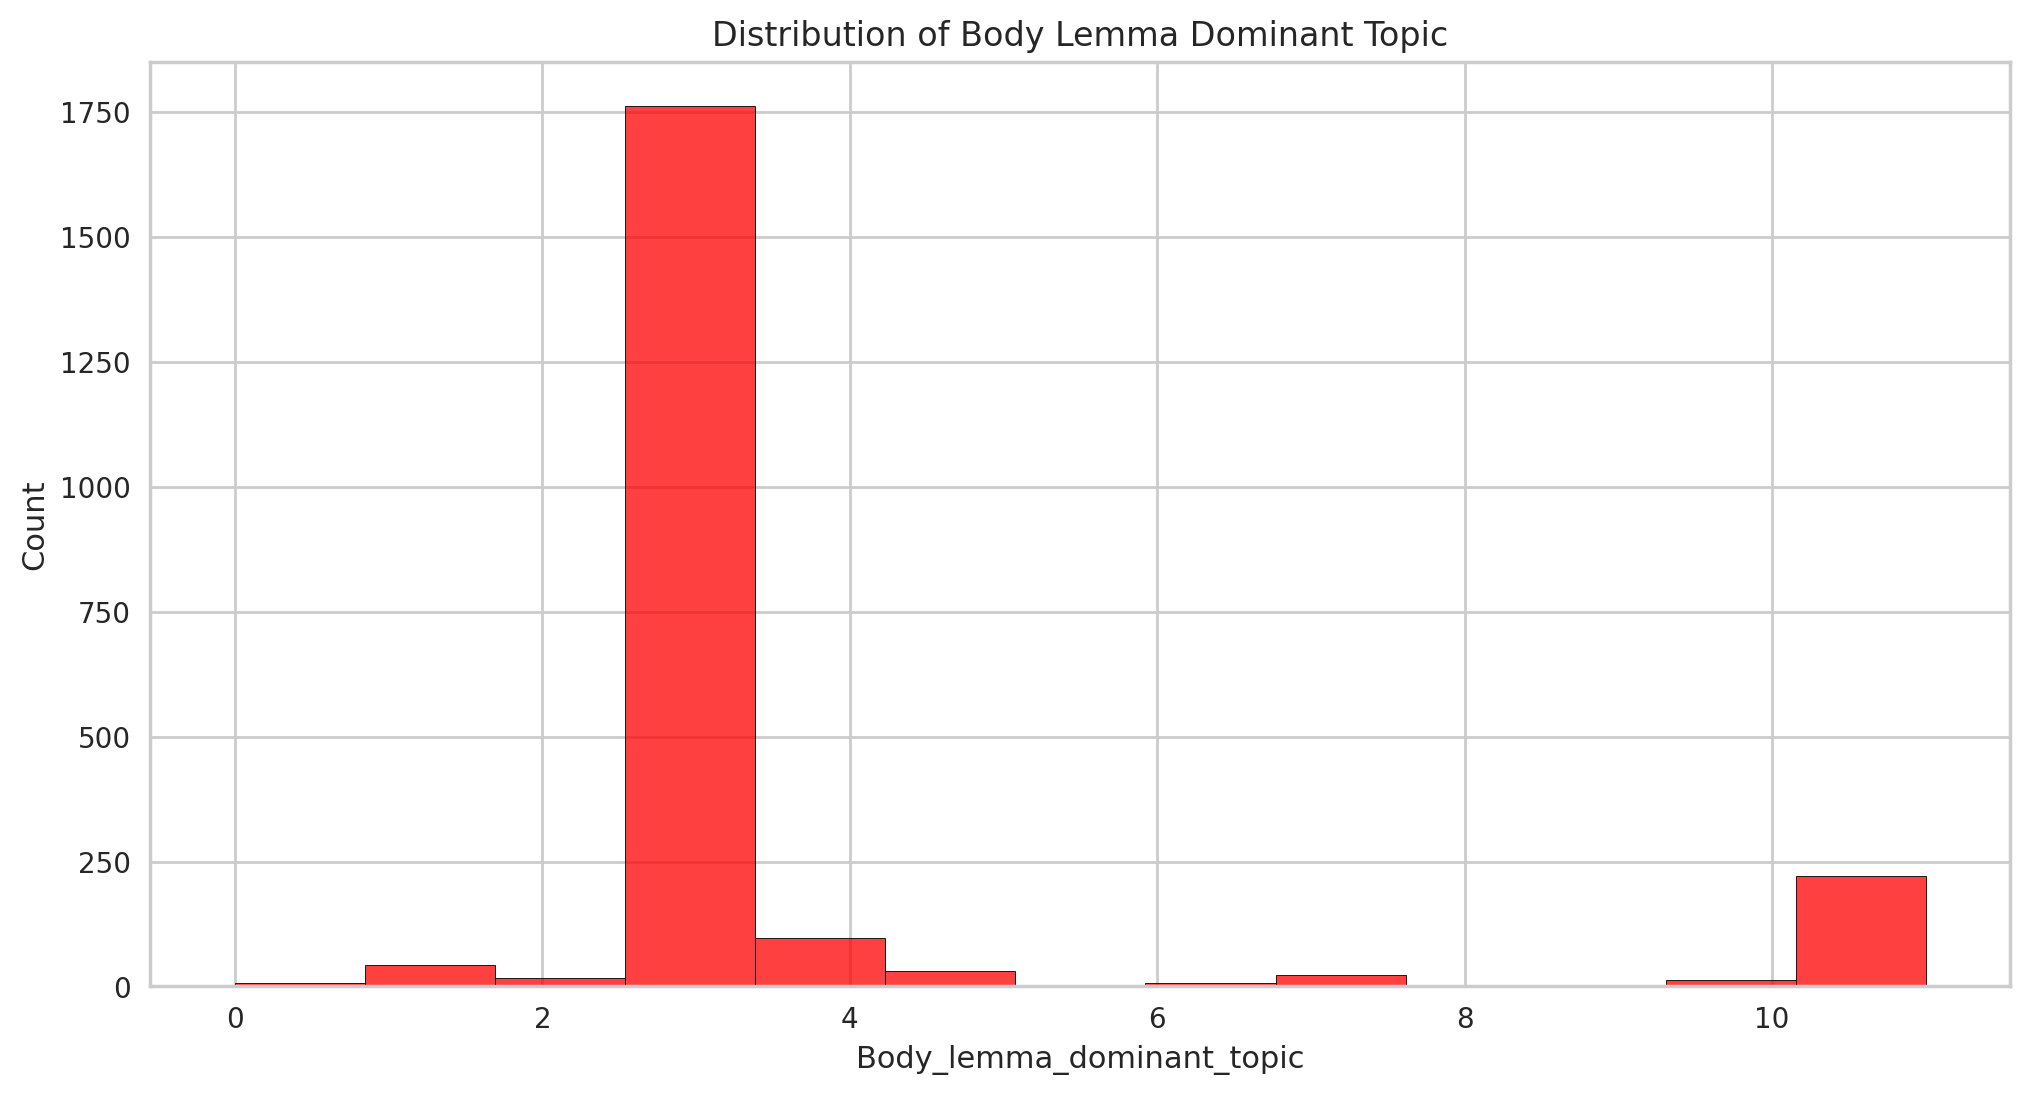

In [44]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df_label_1,x="Body_lemma_dominant_topic",color="red")
plt.title("Distribution of Body Lemma Dominant Topic")
plt.show()

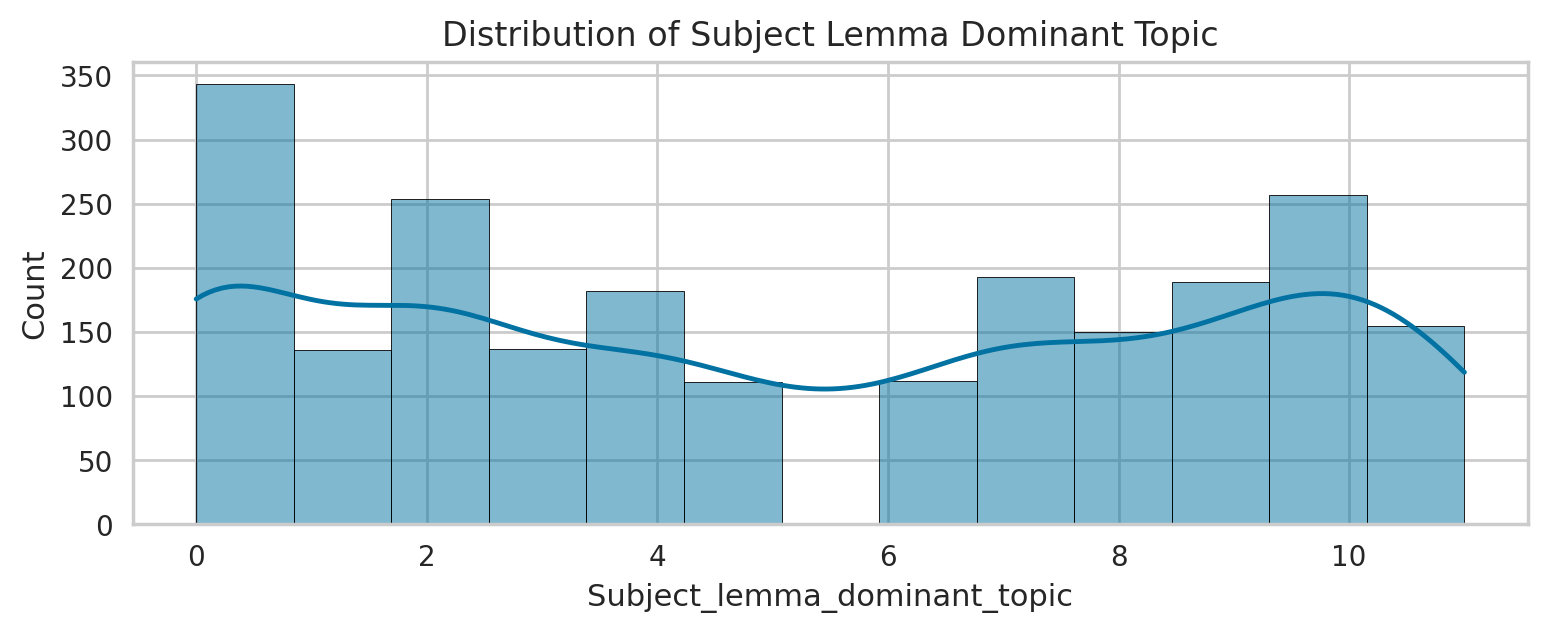

In [45]:
plt.figure(figsize=(9,3),dpi=200)
sns.histplot(data=df_label_1,x="Subject_lemma_dominant_topic",kde=True)
plt.title("Distribution of Subject Lemma Dominant Topic")
plt.show()

In [46]:
pd.DataFrame(df_label_1.Body_lemma_dominant_topic.value_counts()).head()

count
Body_lemma_dominant_topic       
3                           1761
11                           221
4                             97
1                             43
5                             31

In [47]:
pd.DataFrame(df_label_1.Subject_lemma_dominant_topic.value_counts()).head()

count
Subject_lemma_dominant_topic       
0                               343
10                              257
2                               254
7                               193
9                               189

In [48]:
df_label_1 = df_label_1.drop(['Body_lemma', 'Subject_lemma'], axis=1)

In [49]:
scaler = StandardScaler()
df_scaled_label_1 = scaler.fit_transform(df_label_1)

In [50]:
df_scaled_label_1[0]

array([-1.30753258,  1.05526821, -0.71312085,  0.95018246, -1.41520752,
        0.36096103, -0.4392825 ,  0.57514022, -0.34339015,  0.        ,
        1.29002336,  0.        , -0.20802367,  0.94575446, -0.71324096,
       -0.32977408, -0.11525081, -0.54758309, -0.11525081, -0.31404648,
       -0.60946695, -0.16100692, -0.77386136, -0.41532921, -0.46685677,
       -0.41532921, -0.06915707,  0.        ,  0.0528065 , -0.36207494,
        1.01784359, -0.14455955,  0.09302726, -0.47074885, -0.0858521 ,
        0.45994244,  0.27025551, -0.48282449,  0.33522247, -0.56958736,
        1.34587995, -0.52138877, -0.52259989, -0.38137786, -0.54374447,
       -0.34642606, -0.06445661, -0.60844761, -0.48830099, -0.3501758 ,
       -0.29285966, -0.63300535])

In [51]:
df_scaled_label_1  = pd.DataFrame(df_scaled_label_1,columns=df_label_1.columns)
df_scaled_label_1.head()

Year     Month       Day      Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic       VBZ       VBD        CD       PRP        VB       VBN        RB        TO        RP       VBG       NNP       VBP        JJ       NNS        IN        DT        CC       JJS        WP        NN       JJR
0 -1.307533  1.055268 -0.713121  0.950182    -1.415208                  0.360961                 -0.439282                 0.575140                 -0.343390          0.0                  1.290023                      0.0              -0.208024                       0.945754                          -0.713241                -0.329774                  -0.115251           -0.547583                    -0.115251           -0.314046                   -0.609467                       -0.161007             -0.773861               -0.415329        -0.466857                 -0.415329  -0.069157    0.0                 0.052806                  -0.362075                      1.017844 -0.144560  0.093027 -0.470749 -0.085852  0.459942  0.270256 -0.482824  0.335222 -0.569587  1.345880 -0.521389 -0.522600 -0.381378 -0.543744 -0.346426 -0.064457 -0.608448 -0.488301 -0.350176 -0.292860 -0.633005
1 -1.307533  0.805307 -0.366353  1.098728    -0.860180                  0.430161                 -0.106508                 0.289422                 -0.388109          0.0                 -0.628584                      0.0              -0.208024                      -0.404280                          -0.713241                -0.903283                  -0.759548            1.636137                    -0.759548           -0.484994                   -0.609467                        0.532591             -0.196667                0.933462        -0.108761                  0.933462  -0.069157    0.0                 0.714664                   0.037848                     -0.053342 -0.144560  0.093027 -0.379366 -0.389366 -0.419222  0.549055 -0.482824 -0.151384 -0.569587 -0.272531 -0.257126 -0.196168 -0.381378 -0.191333 -0.011375 -0.064457 -0.753065  0.585574 -0.350176 -0.432418 -0.633005
2  0.084033  0.555345  0.442770 -0.089636     1.914957                  0.441824                  0.428308                -1.227081                  1.691307          0.0                 -0.628584                      0.0              -0.208024                      -0.629286                           0.890287                -0.630183                  -0.069230            0.388297                    -0.069230            0.027849                   -0.609467                        0.209764             -0.546729               -0.663617        -0.655873                 -0.663617  -0.069157    0.0                 0.714664                   2.837305                     -0.588935  0.086715 -0.188593 -0.379366  0.521177  0.557627  0.549055  0.228116  0.173020  1.414580 -0.542266 -0.292361  0.293480 -0.158864  0.425387 -0.178900  0.074205  0.403872 -0.488301 -0.350176  0.265376  1.104334
3  0.084033  0.555345  1.251894 -0.535273     1.914957                  0.246923                 -0.902790                 0.948771                 -0.231594          0.0                  2.249327                      0.0              -0.208024                       0.270737                          -0.713241                -0.329774                  -0.759548           -0.547583                    -0.759548            0.027849            

In [52]:
from sklearn.cluster import KMeans

# Perform K-means clustering
k_means_model = KMeans(n_clusters=5, random_state=0).fit(df_scaled_label_1)

# Get the feature names from the DataFrame
feature_names = df_scaled_label_1.columns

# For each cluster...
for i in range(k_means_model.n_clusters):
    # Get the centroid of the cluster
    centroid = k_means_model.cluster_centers_[i]
    
    # Get the top 10 features for this cluster
    top10 = centroid.argsort()[-10:]
    
    # Print the features
    print(f"Top features for cluster {i}:")
    for j in top10:
        print(feature_names[j])


Top features for cluster 0:
Subject_median_words_per_sentence
JJR
IN
PRP
RB
NN
TO
sentiment_score_compound
Body_num_sentences
VB
Top features for cluster 1:
Hour
Body_uppercase_ratio
sentiment_score_neutral
Body_median_chars_per_word
sentiment_score_negative
Subject_special_chars_ratio
Subject_punctuation_ratio
Body_punctuation_ratio
Body_special_chars_ratio
Body_typo_ratio
Top features for cluster 2:
Body_num_sentences
VBZ
NN
RB
VBG
VBP
CC
IN
NNS
DT
Top features for cluster 3:
RB
NNS
JJ
DT
TO
VB
CC
Body_num_sentences
NN
IN
Top features for cluster 4:
Subject_median_chars_per_word
Hour
Body_median_words_per_sentence
Unique-Mails-From-Sender
Body_lexical_complexity
Subject_uppercase_ratio
Body_uppercase_ratio
Month
sentiment_score_compound
sentiment_score_positive


In [53]:
ssd = []

for k in range(1,6):
    model = KMeans(n_clusters=k)
    model.fit(df_label_1)
    
    ssd.append(model.inertia_) ## SSD Point to cluster centers

ssd

[12741265.95586292,
 6945984.982734769,
 5087270.764355704,
 4209216.650091159,
 3574797.5301443907]

In [54]:
pd.Series(ssd).diff()

0             NaN
1   -5.795281e+06
2   -1.858714e+06
3   -8.780541e+05
4   -6.344191e+05
dtype: float64

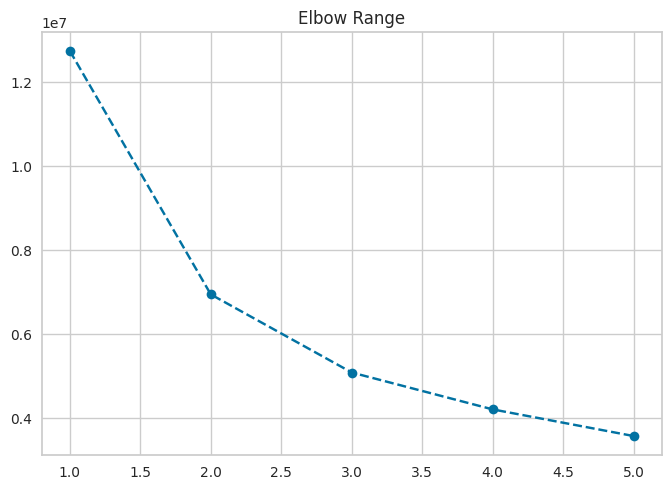

In [55]:
plt.plot(range(1,6),ssd,"o--")
plt.title("Elbow Range")
plt.show()

In [56]:
cluster_labels = k_means_model.predict(df_scaled_label_1) #we can also do that with fit_predict() method.

In [57]:
cluster_labels

array([4, 4, 0, ..., 4, 1, 0], dtype=int32)

In [58]:
df_label_1["Cluster"] = cluster_labels

In [59]:
df_label_1.head()

Year  Month  Day  Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic  VBZ  VBD  CD  PRP  VB  VBN  RB  TO  RP  VBG  NNP  VBP  JJ  NNS  IN  DT  CC  JJS  WP  NN  JJR  Cluster
18  2000     12   11    19            0                    0.9370                     0.127                    0.857                     0.016            0                  0.000547                        0                    0.0                       0.105263                           0.081081                 0.100000                   0.033333            0.000000                     0.033333            0.019355                    0.052632                        0.014516              0.036765                0.039216         0.020548                  0.039216        0.0      1                 0.952381                          3                             9    3    2   2    8  16    4   3   8   0    8   19    2   8    3  12  12   2    0   0  22    0        4
24  2000     11   14    20            1                    0.9637                     0.155                    0.831                     0.014            0                  0.000182                        0                    0.0                       0.042105                           0.081081                 0.000000                   0.000000            0.333333                     0.000000            0.015054                    0.052632                        0.018683              0.080963                0.107221         0.042254                  0.107221        0.0      1                 1.000000                          4                             5    3    2   3    5   7    5   3   5   0    2   34    4   8    7  18  12   1    1   0  18    0        4
47  2001     10   21    12            6                    0.9682                     0.200                    0.693                     0.107            0                  0.000182                        0                    0.0                       0.031579                           0.189189                 0.047619                   0.035714            0.142857                     0.035714            0.027957                    0.052632                        0.016743              0.054157                0.026697         0.009091                  0.026697        0.0      1                 1.000000                         11                             3    4    1   3   14  17    5   8   7   2    1   32    7  12   14  15  14   9    0   0  38    2        0
59  2001     10   28     9            6                    0.8930                     0.088                    0.891                     0.021            0                  0.000729                        0                    0.0                       0.073684                           0.081081                 0.100000                   0.000000            0.000000                     0.000000            0.027957                    0.052632                        0.012366              0.274336                0.128319         0.049451                  0.128319        0.0      1                 0.775000                          3                             0    2    0   2    6   7    4   8   1   1    3  135   15  14    4  10   3   6    0   0  30    0        4
82  2001     11    6    17            1                   -0.4767                     0.000                    0.814                     0.186            0    

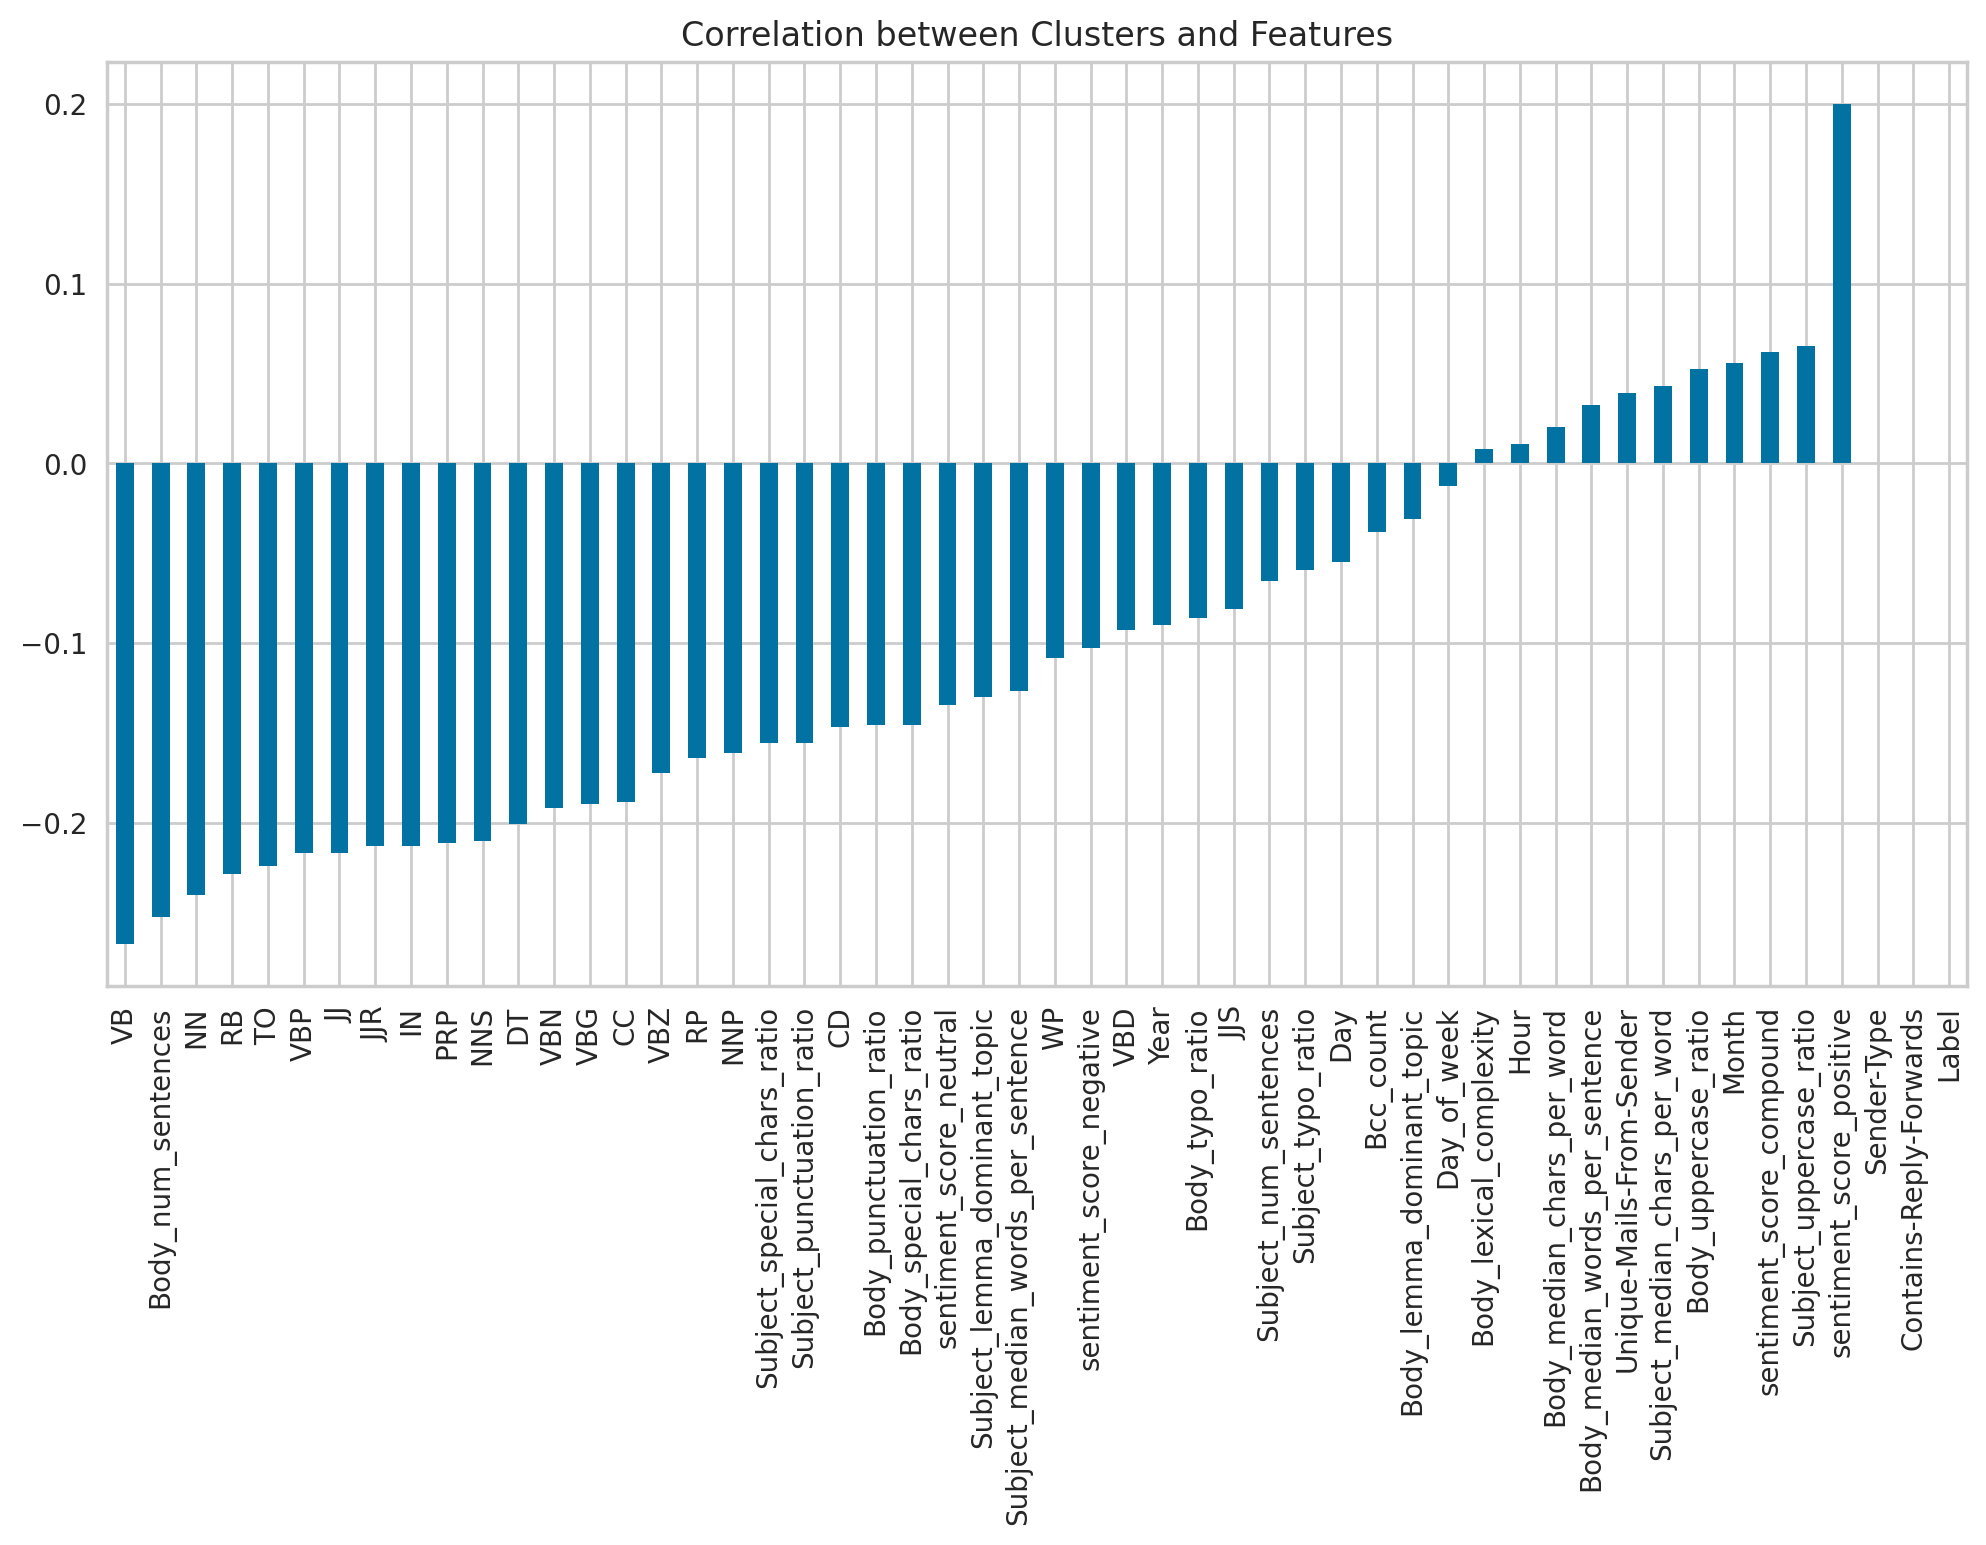

In [60]:
plt.figure(figsize=(12,6),dpi=200)
df_label_1.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

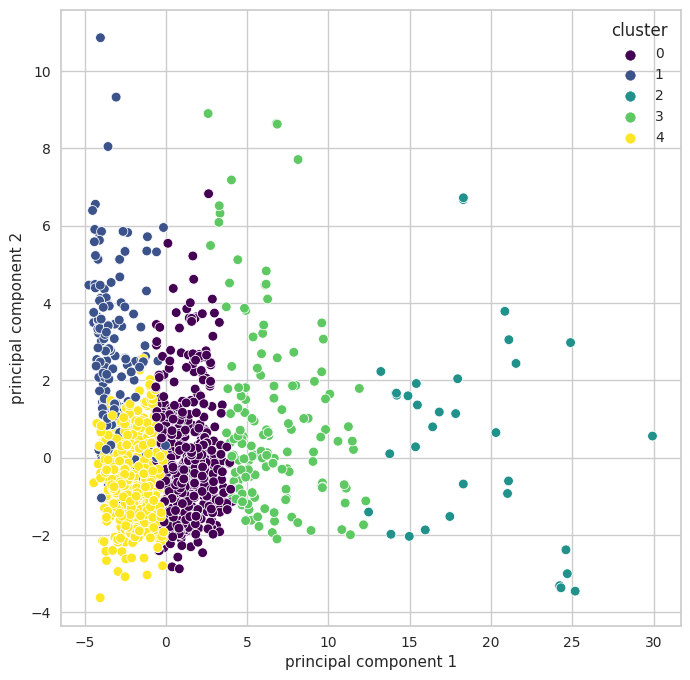

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled_label_1)

# Create a DataFrame with the two components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Concatenate the clusters labels to the DataFrame
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':k_means_model.labels_})], axis = 1)

# Plot the clusters
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf, palette="viridis")
plt.show()


## Hierarchical Clustering

In [62]:
df_label_1_2 = pd.read_csv("../input/enron-clean/enron_clean_V2.csv")

In [63]:
df_label_1_2 = df_label_1_2[df_label_1_2['Label'] == 1]

In [64]:
df_label_1_2.Label.value_counts()

Label
1    2219
Name: count, dtype: int64

In [65]:
df_label_1_2 = df_label_1_2.drop(["Subject_lemma", "Body_lemma"],axis=1)

In [66]:
df_label_1_2.head()

Year  Month  Day  Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic  VBZ  VBD  CD  PRP  VB  VBN  RB  TO  RP  VBG  NNP  VBP  JJ  NNS  IN  DT  CC  JJS  WP  NN  JJR
18  2000     12   11    19            0                    0.9370                     0.127                    0.857                     0.016            0                  0.000547                        0                    0.0                       0.105263                           0.081081                 0.100000                   0.033333            0.000000                     0.033333            0.019355                    0.052632                        0.014516              0.036765                0.039216         0.020548                  0.039216        0.0      1                 0.952381                          3                             9    3    2   2    8  16    4   3   8   0    8   19    2   8    3  12  12   2    0   0  22    0
24  2000     11   14    20            1                    0.9637                     0.155                    0.831                     0.014            0                  0.000182                        0                    0.0                       0.042105                           0.081081                 0.000000                   0.000000            0.333333                     0.000000            0.015054                    0.052632                        0.018683              0.080963                0.107221         0.042254                  0.107221        0.0      1                 1.000000                          4                             5    3    2   3    5   7    5   3   5   0    2   34    4   8    7  18  12   1    1   0  18    0
47  2001     10   21    12            6                    0.9682                     0.200                    0.693                     0.107            0                  0.000182                        0                    0.0                       0.031579                           0.189189                 0.047619                   0.035714            0.142857                     0.035714            0.027957                    0.052632                        0.016743              0.054157                0.026697         0.009091                  0.026697        0.0      1                 1.000000                         11                             3    4    1   3   14  17    5   8   7   2    1   32    7  12   14  15  14   9    0   0  38    2
59  2001     10   28     9            6                    0.8930                     0.088                    0.891                     0.021            0                  0.000729                        0                    0.0                       0.073684                           0.081081                 0.100000                   0.000000            0.000000                     0.000000            0.027957                    0.052632                        0.012366              0.274336                0.128319         0.049451                  0.128319        0.0      1                 0.775000                          3                             0    2    0   2    6   7    4   8   1   1    3  135   15  14    4  10   3   6    0   0  30    0
82  2001     11    6    17            1                   -0.4767                     0.000                    0.814                     0.186            0                  0.000729                       

In [67]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_label_1_2)
X_scaled[:5]

array([[0.77777778, 1.        , 0.33333333, 0.82608696, 0.        ,
        0.96850948, 0.2251773 , 0.79001468, 0.04210526, 0.        ,
        0.75      , 0.        , 0.        , 0.12345679, 0.16666667,
        0.1       , 0.06296296, 0.        , 0.06296296, 0.08333333,
        0.10526316, 0.19      , 0.04998441, 0.07773109, 0.03253425,
        0.07773109, 0.        , 0.        , 0.93154762, 0.27272727,
        0.81818182, 0.06      , 0.02564103, 0.01369863, 0.05128205,
        0.21917808, 0.125     , 0.03703704, 0.17391304, 0.        ,
        0.21621622, 0.03193277, 0.03030303, 0.05479452, 0.03296703,
        0.08219178, 0.10344828, 0.03225806, 0.        , 0.        ,
        0.09401709, 0.        ],
       [0.77777778, 0.90909091, 0.43333333, 0.86956522, 0.16666667,
        0.98194074, 0.2748227 , 0.75183554, 0.03684211, 0.        ,
        0.25      , 0.        , 0.        , 0.04938272, 0.16666667,
        0.        , 0.        , 0.33333333, 0.        , 0.06481481,
        0.10526

In [68]:
df_scaled_label_1_2  = pd.DataFrame(X_scaled,columns=df_label_1_2.columns)

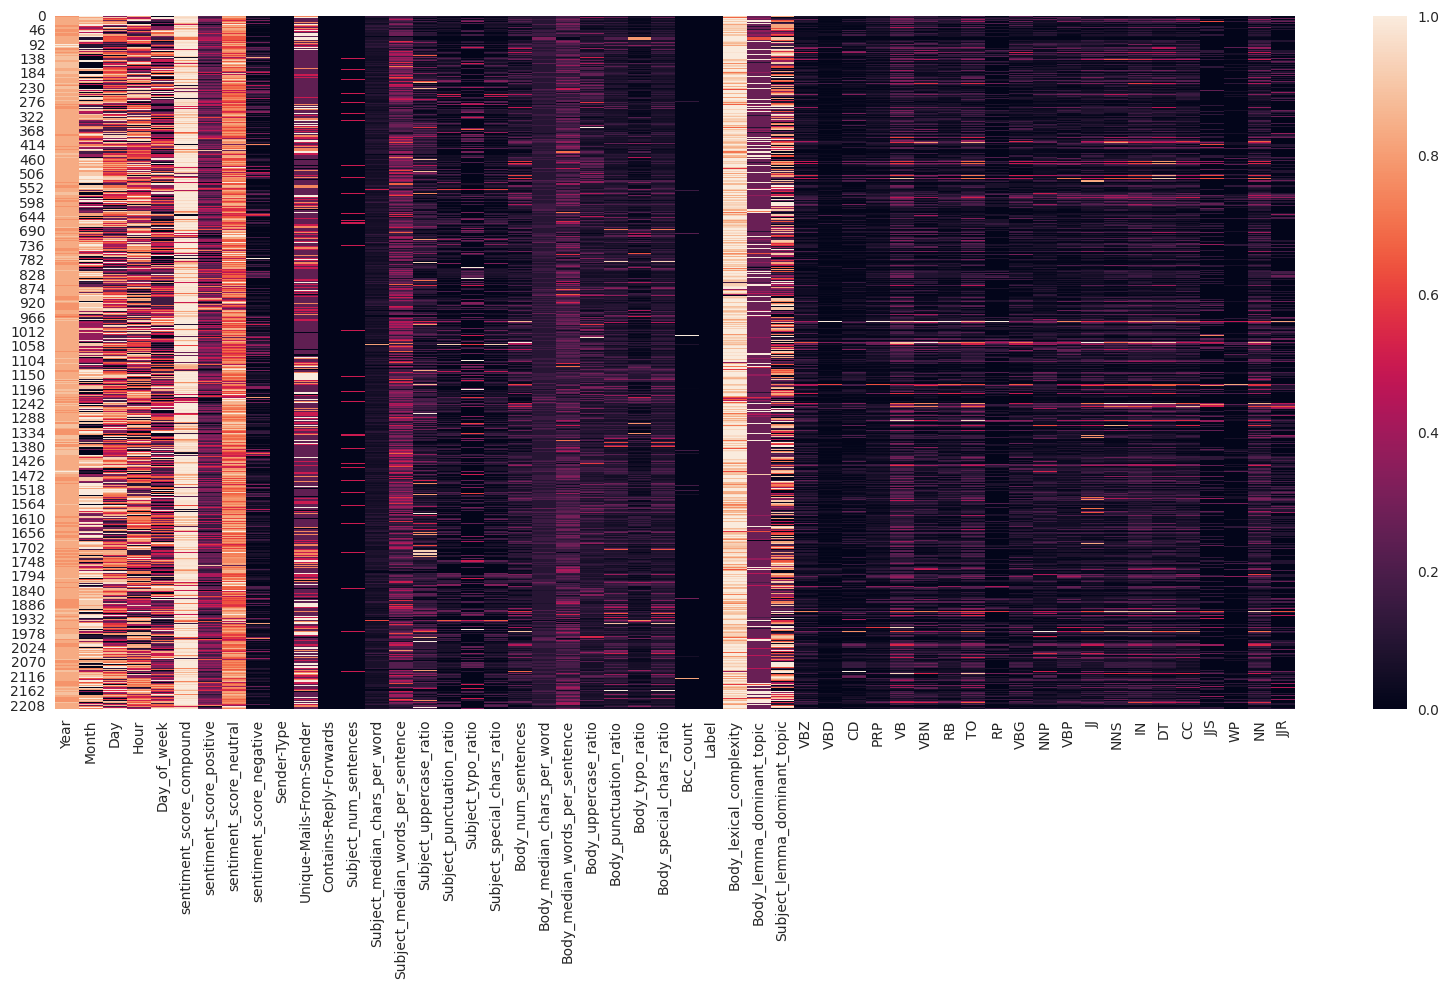

In [69]:
plt.figure(figsize=(20,9))
sns.heatmap(df_scaled_label_1_2)
plt.show()

<Figure size 2000x900 with 0 Axes>

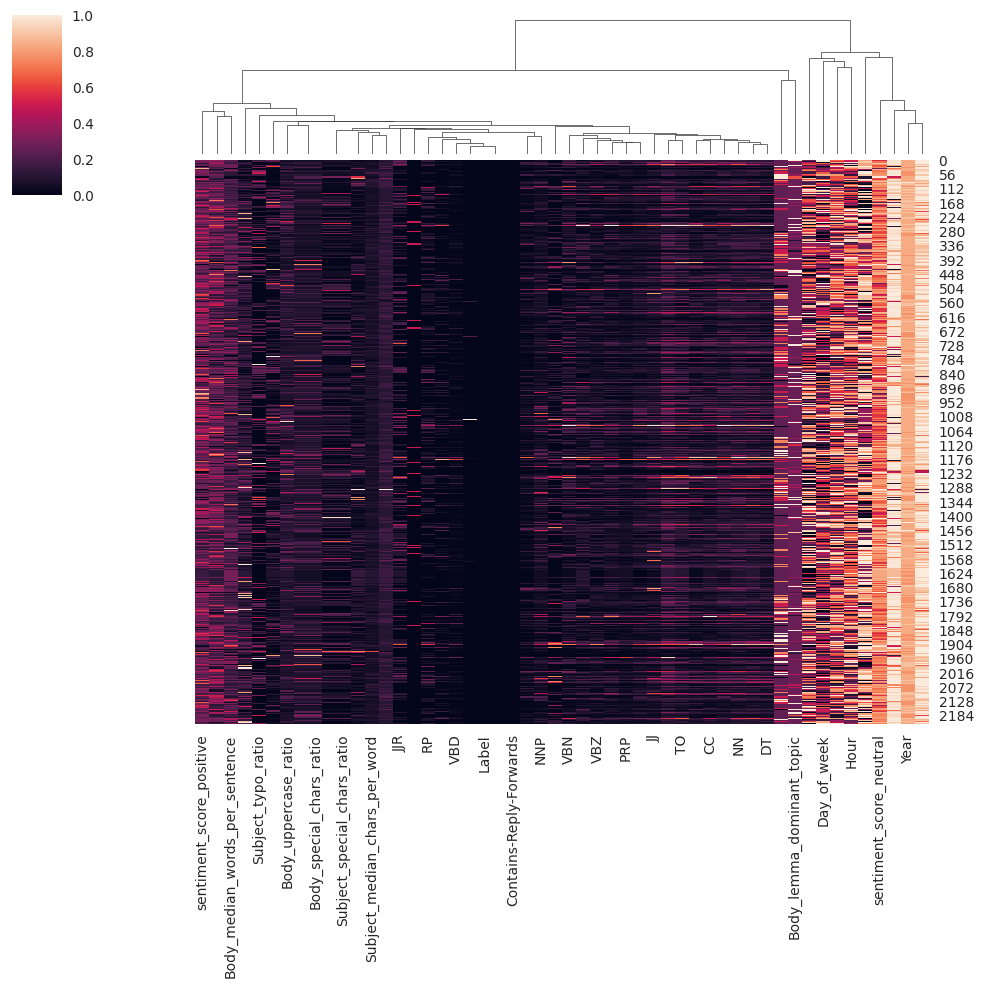

In [70]:
plt.figure(figsize=(20,9))
sns.clustermap(df_scaled_label_1_2,row_cluster=False)
plt.show()

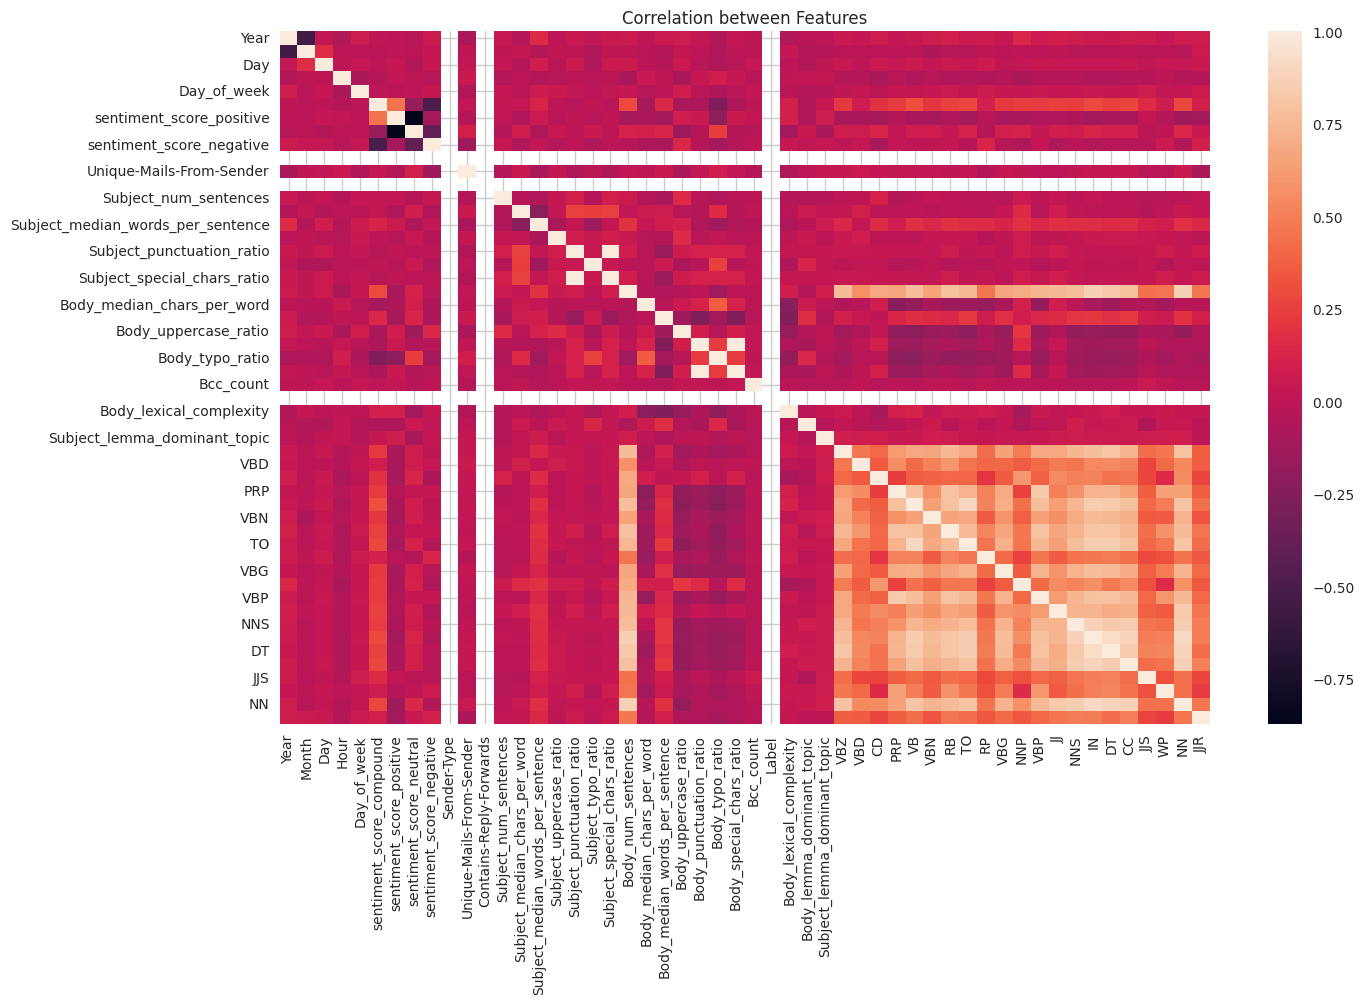

In [71]:
plt.figure(figsize=(15,9))
sns.heatmap(df_scaled_label_1_2.corr())
plt.title("Correlation between Features")
plt.show()

In [72]:
hier_model = AgglomerativeClustering(n_clusters=5,affinity="euclidean") #distance_threshold is also important.

In [73]:
cluster_labels = hier_model.fit_predict(df_scaled_label_1_2)

In [74]:
cluster_labels[:20]

array([4, 1, 3, 4, 1, 1, 1, 3, 4, 2, 2, 0, 4, 3, 0, 4, 2, 1, 2, 4])

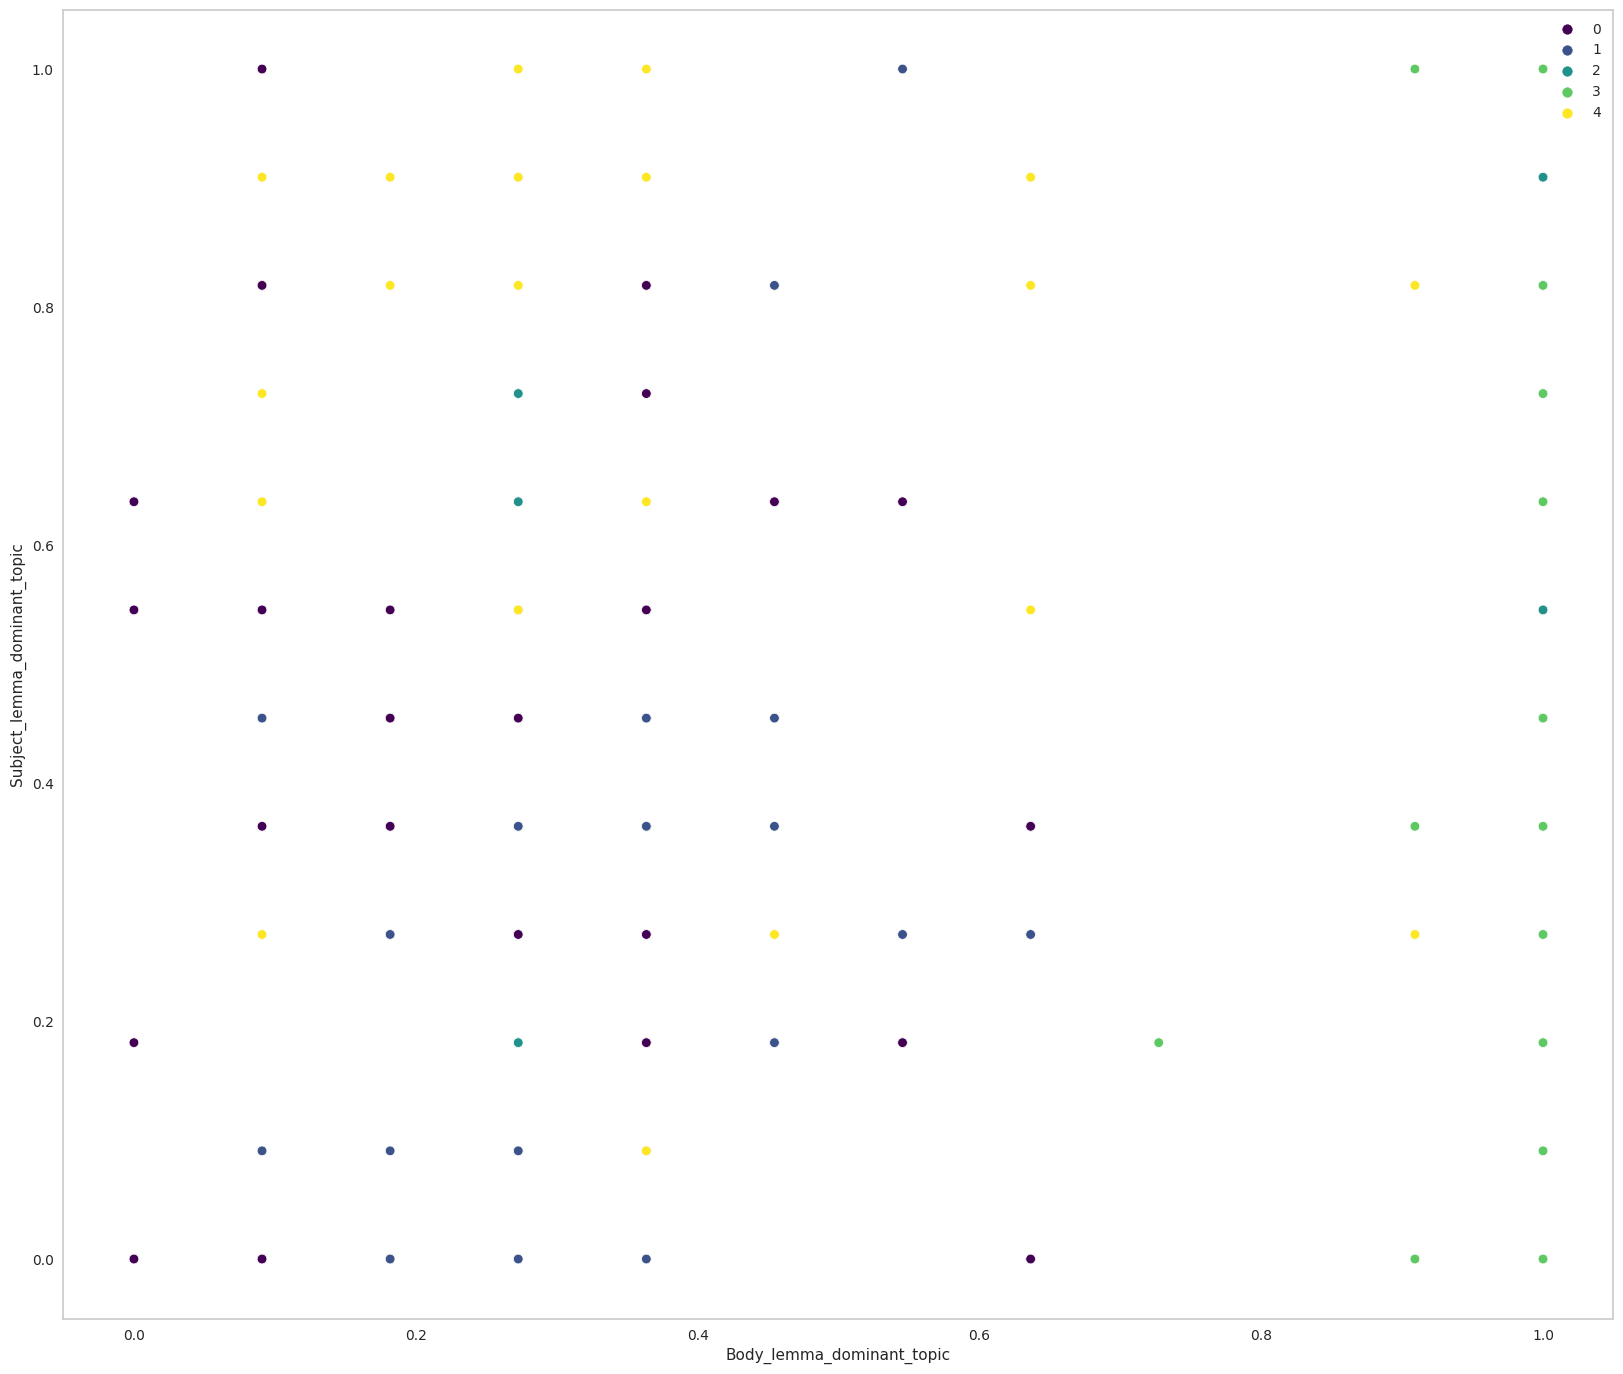

In [75]:
plt.figure(figsize=(20,17))
sns.scatterplot(data=df_scaled_label_1_2,x="Body_lemma_dominant_topic",y="Subject_lemma_dominant_topic",hue=cluster_labels,palette="viridis")
plt.grid(False)

In [76]:
linkage_matrix = hierarchy.linkage(hier_model.children_)
linkage_matrix

array([[0.00000000e+00, 1.00000000e+00, 1.41421356e+00, 2.00000000e+00],
       [3.65000000e+02, 3.66000000e+02, 1.41421356e+00, 2.00000000e+00],
       [3.08000000e+02, 3.40000000e+02, 1.41421356e+00, 2.00000000e+00],
       ...,
       [2.01300000e+03, 4.43100000e+03, 2.08885136e+02, 2.21600000e+03],
       [2.03100000e+03, 4.43200000e+03, 2.23877198e+02, 2.21700000e+03],
       [2.06700000e+03, 4.43300000e+03, 2.33379519e+02, 2.21800000e+03]])

In [77]:
linkage_df = pd.DataFrame(linkage_matrix,columns=["First Point","Second Point","Distance Between Points","How many points are there in the cluster?"])
linkage_df.head()

First Point  Second Point  Distance Between Points  How many points are there in the cluster?
0          0.0           1.0                 1.414214                                        2.0
1        365.0         366.0                 1.414214                                        2.0
2        308.0         340.0                 1.414214                                        2.0
3        139.0         364.0                 1.414214                                        2.0
4        140.0        2221.0                 1.414214                                        3.0

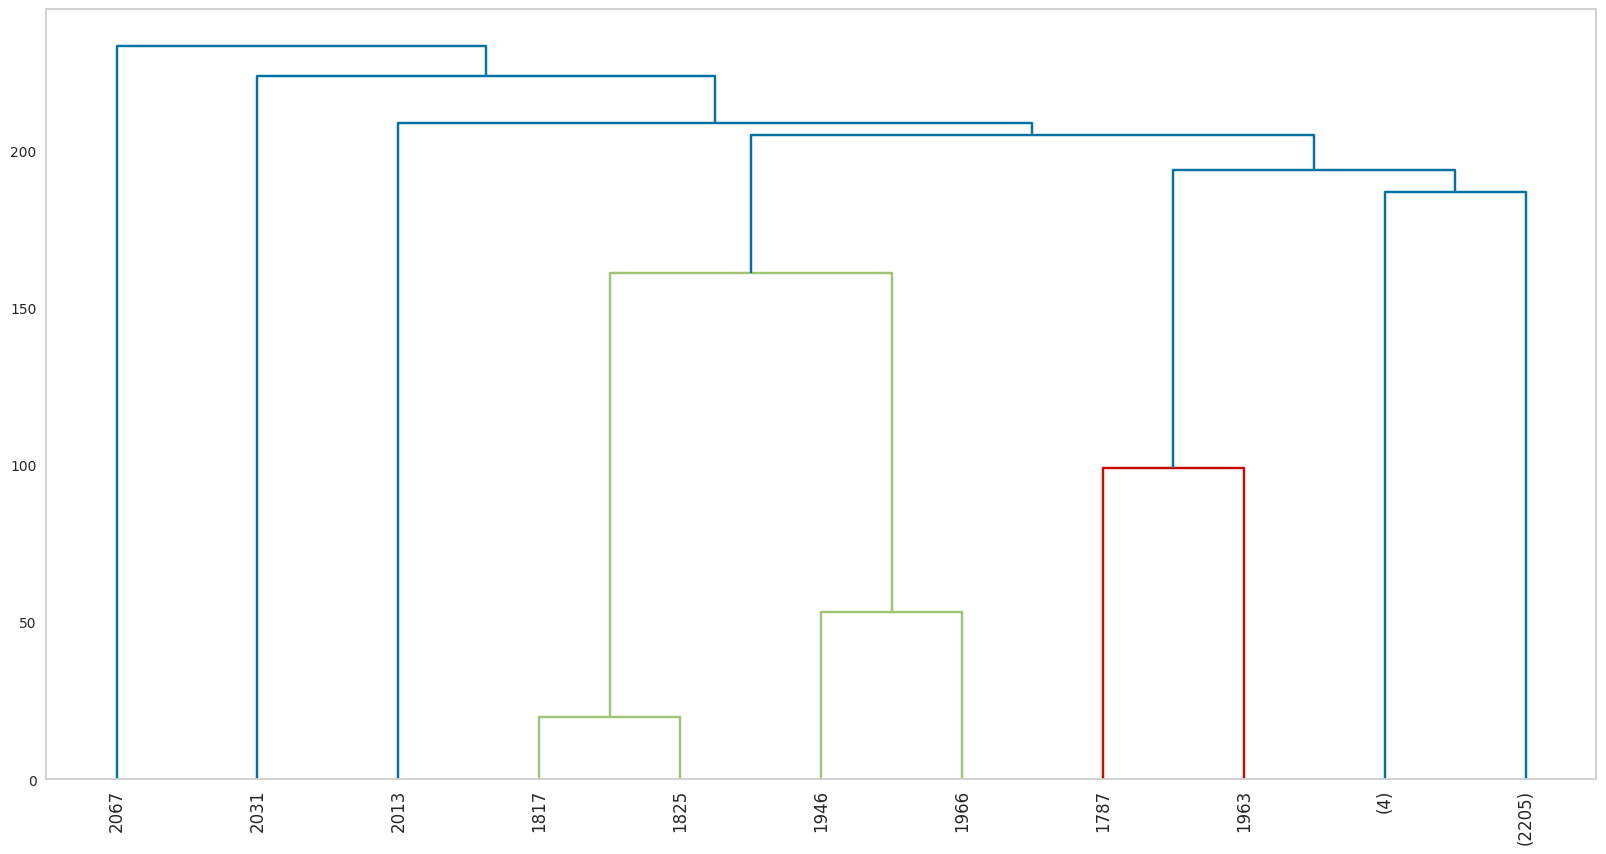

In [78]:
plt.figure(figsize=(20,10))
dendrogram = hierarchy.dendrogram(linkage_matrix,truncate_mode="level",p=5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

# Label = 0

## K-Means Clustering

In [79]:
df_label_0 = pd.read_csv("../input/enron-clean/enron_clean_V2.csv")

In [80]:
df_label_0 = df_label_0[df_label_0['Label'] == 0]

In [81]:
df_label_0.shape

(430855, 54)

In [82]:
df_label_0.head()

Year  Month  Day  Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards                                      Subject_lemma                                         Body_lemma  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic  VBZ  VBD  CD  PRP  VB  VBN  RB  TO  RP  VBG  NNP  VBP  JJ  NNS  IN  DT  CC  JJS  WP  NN  JJR
0  2000     11   16    17            3                    0.9616                     0.226                    0.708                     0.066            0                  0.003281                        0                                             status  status john : I be not really sure what happen...                    0.0                       0.063158                           0.027027                 0.166667                   0.000000            0.000000                     0.000000            0.017204                    0.052632                        0.012067              0.028716                0.055743         0.036036                  0.055743        0.0      0                 0.923077                         11                             5    1    3   2   10   7    2   9   4   2    1    9    8   8    1  12   8   2    1   1  13    0
1  2000     12    8    13            4                    0.5940                     0.074                    0.926                     0.000            0                  0.000729                        0                                re : summer inverse  re : summer inverse I suck - hope you ve make ...                    0.0                       0.089474                           0.054054                 0.000000                   0.055556            0.000000                     0.055556            0.004301                    0.052632                        0.018996              0.000000                0.030508         0.140351                  0.030508        0.0      0                 0.947368                          3                            11    0    1   1    1   4    0   4   1   0    1    0    5   8    3   3   4   2    0   0  15    1
2  2001      5   15    16            1                   -0.3923                     0.036                    0.918                     0.045            0                  0.000547                        0                       the wti bullet swap contract  the wti bullet swap contract hi , follow the e...                    0.0                       0.042105                           0.135135                 0.172414                   0.000000            0.200000                     0.000000            0.004301                    0.052632                        0.062007              0.074792                0.042475         0.088889                  0.042475        0.0      0                 0.775862                          4                             9    1    7  21    6   7    5   4   5   0    8   43    4   6   10   9   9   1    0   1  26    0
3  2000     12   12     7            1                   -0.4767                     0.000                    0.829                     0.171            0                  0.001641                        1  fwd : nytimes.com article : suspend rabbi quit...  fwd : nytimes.com article : suspend rabbi quit...                    0.0                       0.084211                           0.216216                 0.149254                   0.044776            0.111111                     0.044776            0.006452                    0.111842              

In [83]:
df_label_0.Label.value_counts()

Label
0    430855
Name: count, dtype: int64

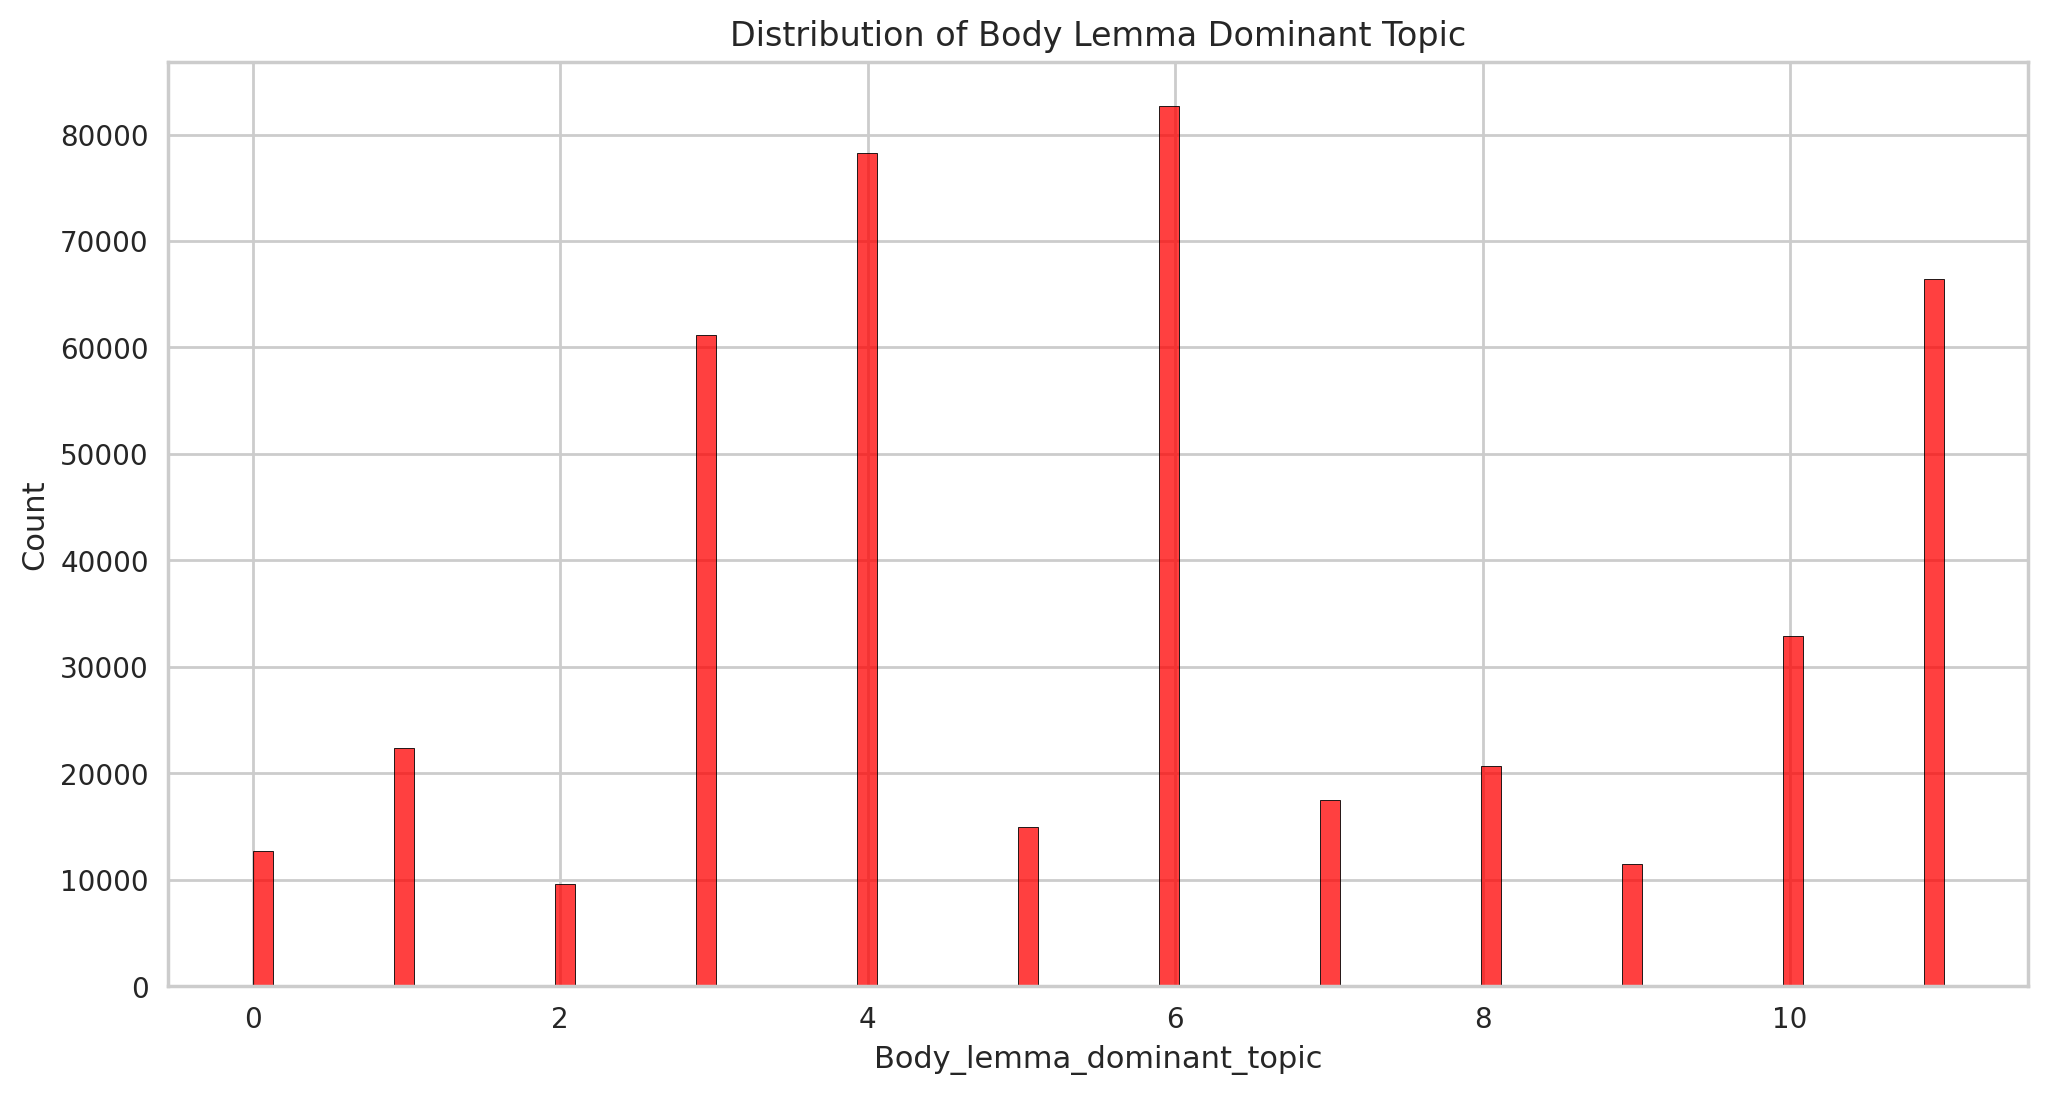

In [84]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df_label_0,x="Body_lemma_dominant_topic",color="red")
plt.title("Distribution of Body Lemma Dominant Topic")
plt.show()

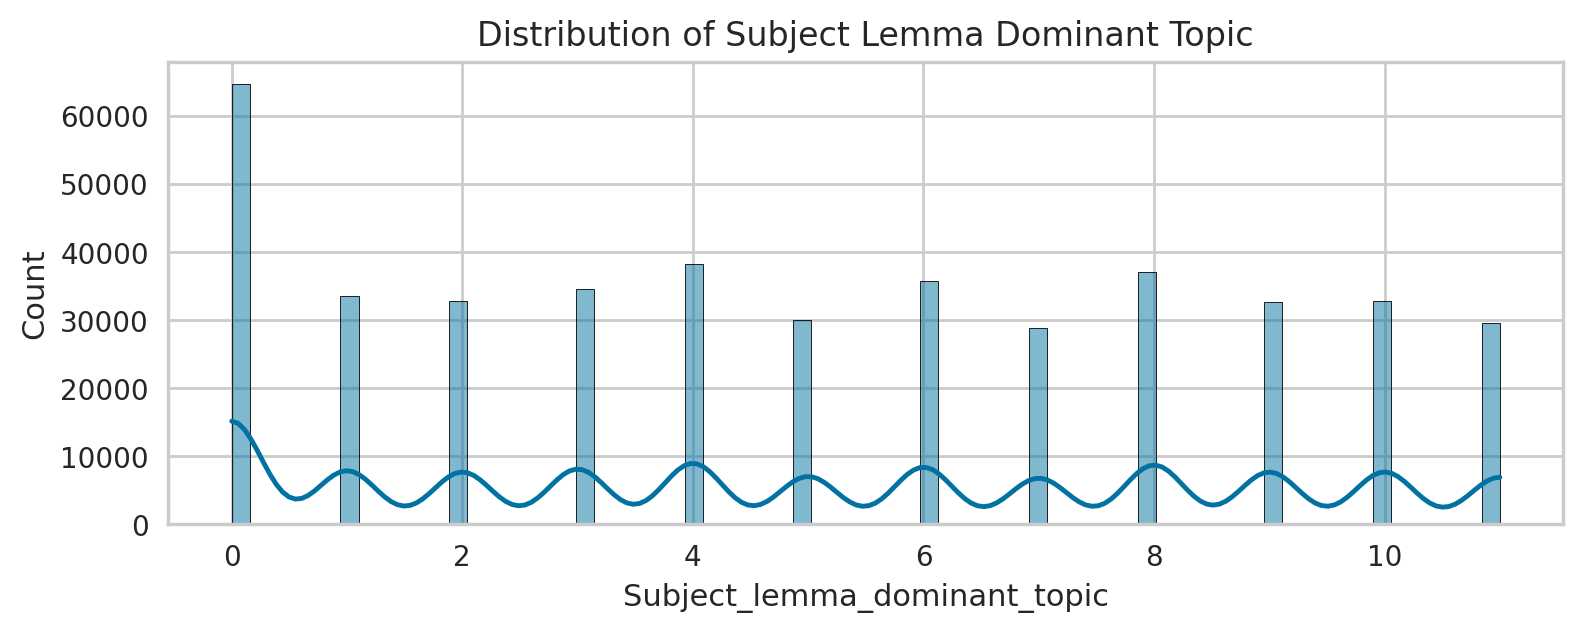

In [85]:
plt.figure(figsize=(9,3),dpi=200)
sns.histplot(data=df_label_0,x="Subject_lemma_dominant_topic",kde=True)
plt.title("Distribution of Subject Lemma Dominant Topic")
plt.show()

In [86]:
pd.DataFrame(df_label_0.Body_lemma_dominant_topic.value_counts()).head()

count
Body_lemma_dominant_topic       
6                          82636
4                          78311
11                         66438
3                          61140
10                         32886

In [87]:
pd.DataFrame(df_label_0.Subject_lemma_dominant_topic.value_counts()).head()

count
Subject_lemma_dominant_topic       
0                             64674
4                             38219
8                             37148
6                             35789
3                             34618

In [88]:
df_label_0 = df_label_0.drop(['Body_lemma', 'Subject_lemma'], axis=1)

In [91]:
scaler = StandardScaler()
df_scaled_label_0 = scaler.fit_transform(df_label_0)

In [93]:
df_scaled_label_0  = pd.DataFrame(df_scaled_label_0,columns=df_label_0.columns)
df_scaled_label_0.head()

Year     Month       Day      Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic       VBZ       VBD        CD       PRP        VB       VBN        RB        TO        RP       VBG       NNP       VBP        JJ       NNS        IN        DT        CC       JJS        WP        NN       JJR
0 -0.712518  1.181687  0.000576  0.693275     0.610306                  1.241282                  1.117563                -1.329703                  0.855311    -2.066042                 -0.673757                -0.622696              -0.108886                       0.298252                          -1.166456                -0.169975                  -0.757525           -0.634512                    -0.757525            0.108680                   -0.480581                       -0.255524             -0.862858               -0.177327        -0.507250                 -0.177327  -0.186204    0.0                -0.020504                   1.575475                     -0.009019 -0.193317  0.129386 -0.176095  0.647391  0.152348 -0.039501  0.628660  0.114152  1.521887 -0.140002 -0.215603  0.930071  0.060033 -0.271312  0.021769 -0.020491 -0.121331  0.920663  0.772064 -0.075644 -0.192247
1 -0.712518  1.454200 -0.909665 -0.132427     1.268206                  0.422469                 -0.311693                 0.488285                 -0.473092    -2.066042                 -0.683321                -0.622696              -0.108886                       1.211039                          -0.797000                -1.112589                  -0.008822           -0.634512                    -0.008822           -0.248066                   -0.480581                        0.357051             -1.239152               -0.612578         0.688243                 -0.612578  -0.186204    0.0                 0.185666                  -0.916392                      1.667287 -0.341269 -0.120366 -0.226054 -0.382048 -0.106081 -0.386955  0.069711 -0.272253 -0.297980 -0.140002 -0.325174  0.417483  0.060033 -0.140189 -0.286622 -0.193840 -0.121331 -0.191227 -0.272566 -0.029153  0.524046
2  0.456926 -0.453390 -0.113204  0.486850    -0.705494                 -1.774472                 -0.669007                 0.421570                  0.432637    -2.066042                 -0.684004                -0.622696              -0.108886                      -0.431978                           0.311366                -0.137471                  -0.757525            0.354334                    -0.757525           -0.248066                   -0.480581                        4.159237             -0.259083               -0.406185         0.098467                 -0.406185  -0.186204    0.0                -1.269966                  -0.604908                      1.108518 -0.193317  0.628891  0.773127  0.189863  0.152348  0.481681  0.069711  0.242954 -0.297980  1.148634  0.198333  0.246620 -0.037446  0.318739 -0.081028  0.022846 -0.228370 -0.191227  0.772064  0.226548 -0.192247
3 -0.712518  1.454200 -0.454544 -1.370980    -0.705494                 -1.962470                 -1.007515                -0.320637                  2.968680    -2.066042                 -0.679905                 1.605919              -0.108886                       1.028481                           1.419733                -0.268457                  -0.154092           -0.085153                    -0.154092           -0.188609            

In [94]:
from sklearn.cluster import KMeans

# Perform K-means clustering
k_means_model = KMeans(n_clusters=5, random_state=0).fit(df_scaled_label_0)

# Get the feature names from the DataFrame
feature_names = df_scaled_label_0.columns

# For each cluster...
for i in range(k_means_model.n_clusters):
    # Get the centroid of the cluster
    centroid = k_means_model.cluster_centers_[i]
    
    # Get the top 10 features for this cluster
    top10 = centroid.argsort()[-10:]
    
    # Print the features
    print(f"Top features for cluster {i}:")
    for j in top10:
        print(feature_names[j])


Top features for cluster 0:
NNP
Body_num_sentences
CC
TO
DT
VB
NNS
JJ
IN
NN
Top features for cluster 1:
Subject_special_chars_ratio
Subject_punctuation_ratio
Subject_uppercase_ratio
Hour
Unique-Mails-From-Sender
Body_lemma_dominant_topic
Contains-Reply-Forwards
sentiment_score_positive
Sender-Type
Body_lexical_complexity
Top features for cluster 2:
IN
CC
DT
VBN
RB
TO
sentiment_score_compound
VBP
VB
PRP
Top features for cluster 3:
RB
TO
NNS
VBZ
DT
Body_num_sentences
NN
JJ
VBD
IN
Top features for cluster 4:
Subject_special_chars_ratio
Subject_punctuation_ratio
Subject_typo_ratio
Unique-Mails-From-Sender
sentiment_score_neutral
Body_uppercase_ratio
Body_median_chars_per_word
Body_typo_ratio
Body_punctuation_ratio
Body_special_chars_ratio


In [95]:
ssd = []

for k in range(1,6):
    model = KMeans(n_clusters=k)
    model.fit(df_label_0)
    
    ssd.append(model.inertia_) ## SSD Point to cluster centers

ssd

[5095820615.939253,
 2235756618.666087,
 1527069893.655314,
 1228891801.5056145,
 1068589781.3083572]

In [96]:
pd.Series(ssd).diff()

0             NaN
1   -2.860064e+09
2   -7.086867e+08
3   -2.981781e+08
4   -1.603020e+08
dtype: float64

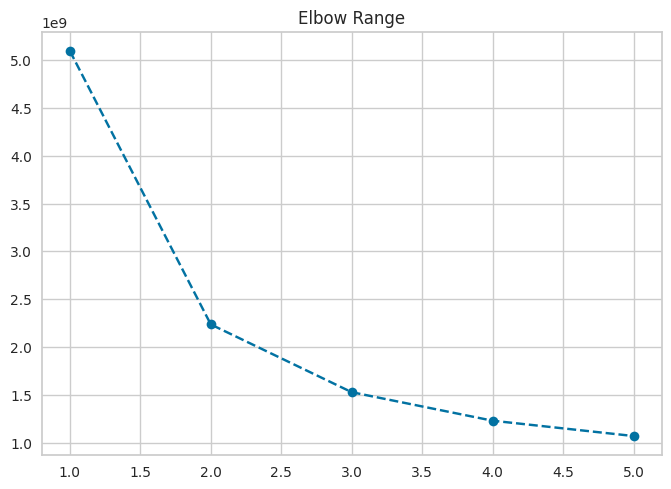

In [97]:
plt.plot(range(1,6),ssd,"o--")
plt.title("Elbow Range")
plt.show()

In [98]:
cluster_labels = k_means_model.predict(df_scaled_label_0) #we can also do that with fit_predict() method.

In [99]:
cluster_labels

array([2, 1, 2, ..., 2, 2, 4], dtype=int32)

In [100]:
df_label_0["Cluster"] = cluster_labels

In [101]:
df_label_0.head()

Year  Month  Day  Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic  VBZ  VBD  CD  PRP  VB  VBN  RB  TO  RP  VBG  NNP  VBP  JJ  NNS  IN  DT  CC  JJS  WP  NN  JJR  Cluster
0  2000     11   16    17            3                    0.9616                     0.226                    0.708                     0.066            0                  0.003281                        0                    0.0                       0.063158                           0.027027                 0.166667                   0.000000            0.000000                     0.000000            0.017204                    0.052632                        0.012067              0.028716                0.055743         0.036036                  0.055743        0.0      0                 0.923077                         11                             5    1    3   2   10   7    2   9   4   2    1    9    8   8    1  12   8   2    1   1  13    0        2
1  2000     12    8    13            4                    0.5940                     0.074                    0.926                     0.000            0                  0.000729                        0                    0.0                       0.089474                           0.054054                 0.000000                   0.055556            0.000000                     0.055556            0.004301                    0.052632                        0.018996              0.000000                0.030508         0.140351                  0.030508        0.0      0                 0.947368                          3                            11    0    1   1    1   4    0   4   1   0    1    0    5   8    3   3   4   2    0   0  15    1        1
2  2001      5   15    16            1                   -0.3923                     0.036                    0.918                     0.045            0                  0.000547                        0                    0.0                       0.042105                           0.135135                 0.172414                   0.000000            0.200000                     0.000000            0.004301                    0.052632                        0.062007              0.074792                0.042475         0.088889                  0.042475        0.0      0                 0.775862                          4                             9    1    7  21    6   7    5   4   5   0    8   43    4   6   10   9   9   1    0   1  26    0        2
3  2000     12   12     7            1                   -0.4767                     0.000                    0.829                     0.171            0                  0.001641                        1                    0.0                       0.084211                           0.216216                 0.149254                   0.044776            0.111111                     0.044776            0.006452                    0.111842                        0.004301              0.076923                0.117949         0.310345                  0.117949        0.0      0                 0.617647                          2                             5    0    1   1    0   1    1   0   1   0    0   10    0   2    0   1   0   0    0   0  10    0        4
4  2001      5   15     6            1                   -0.0772                     0.058                    0.893                     0.050            0         

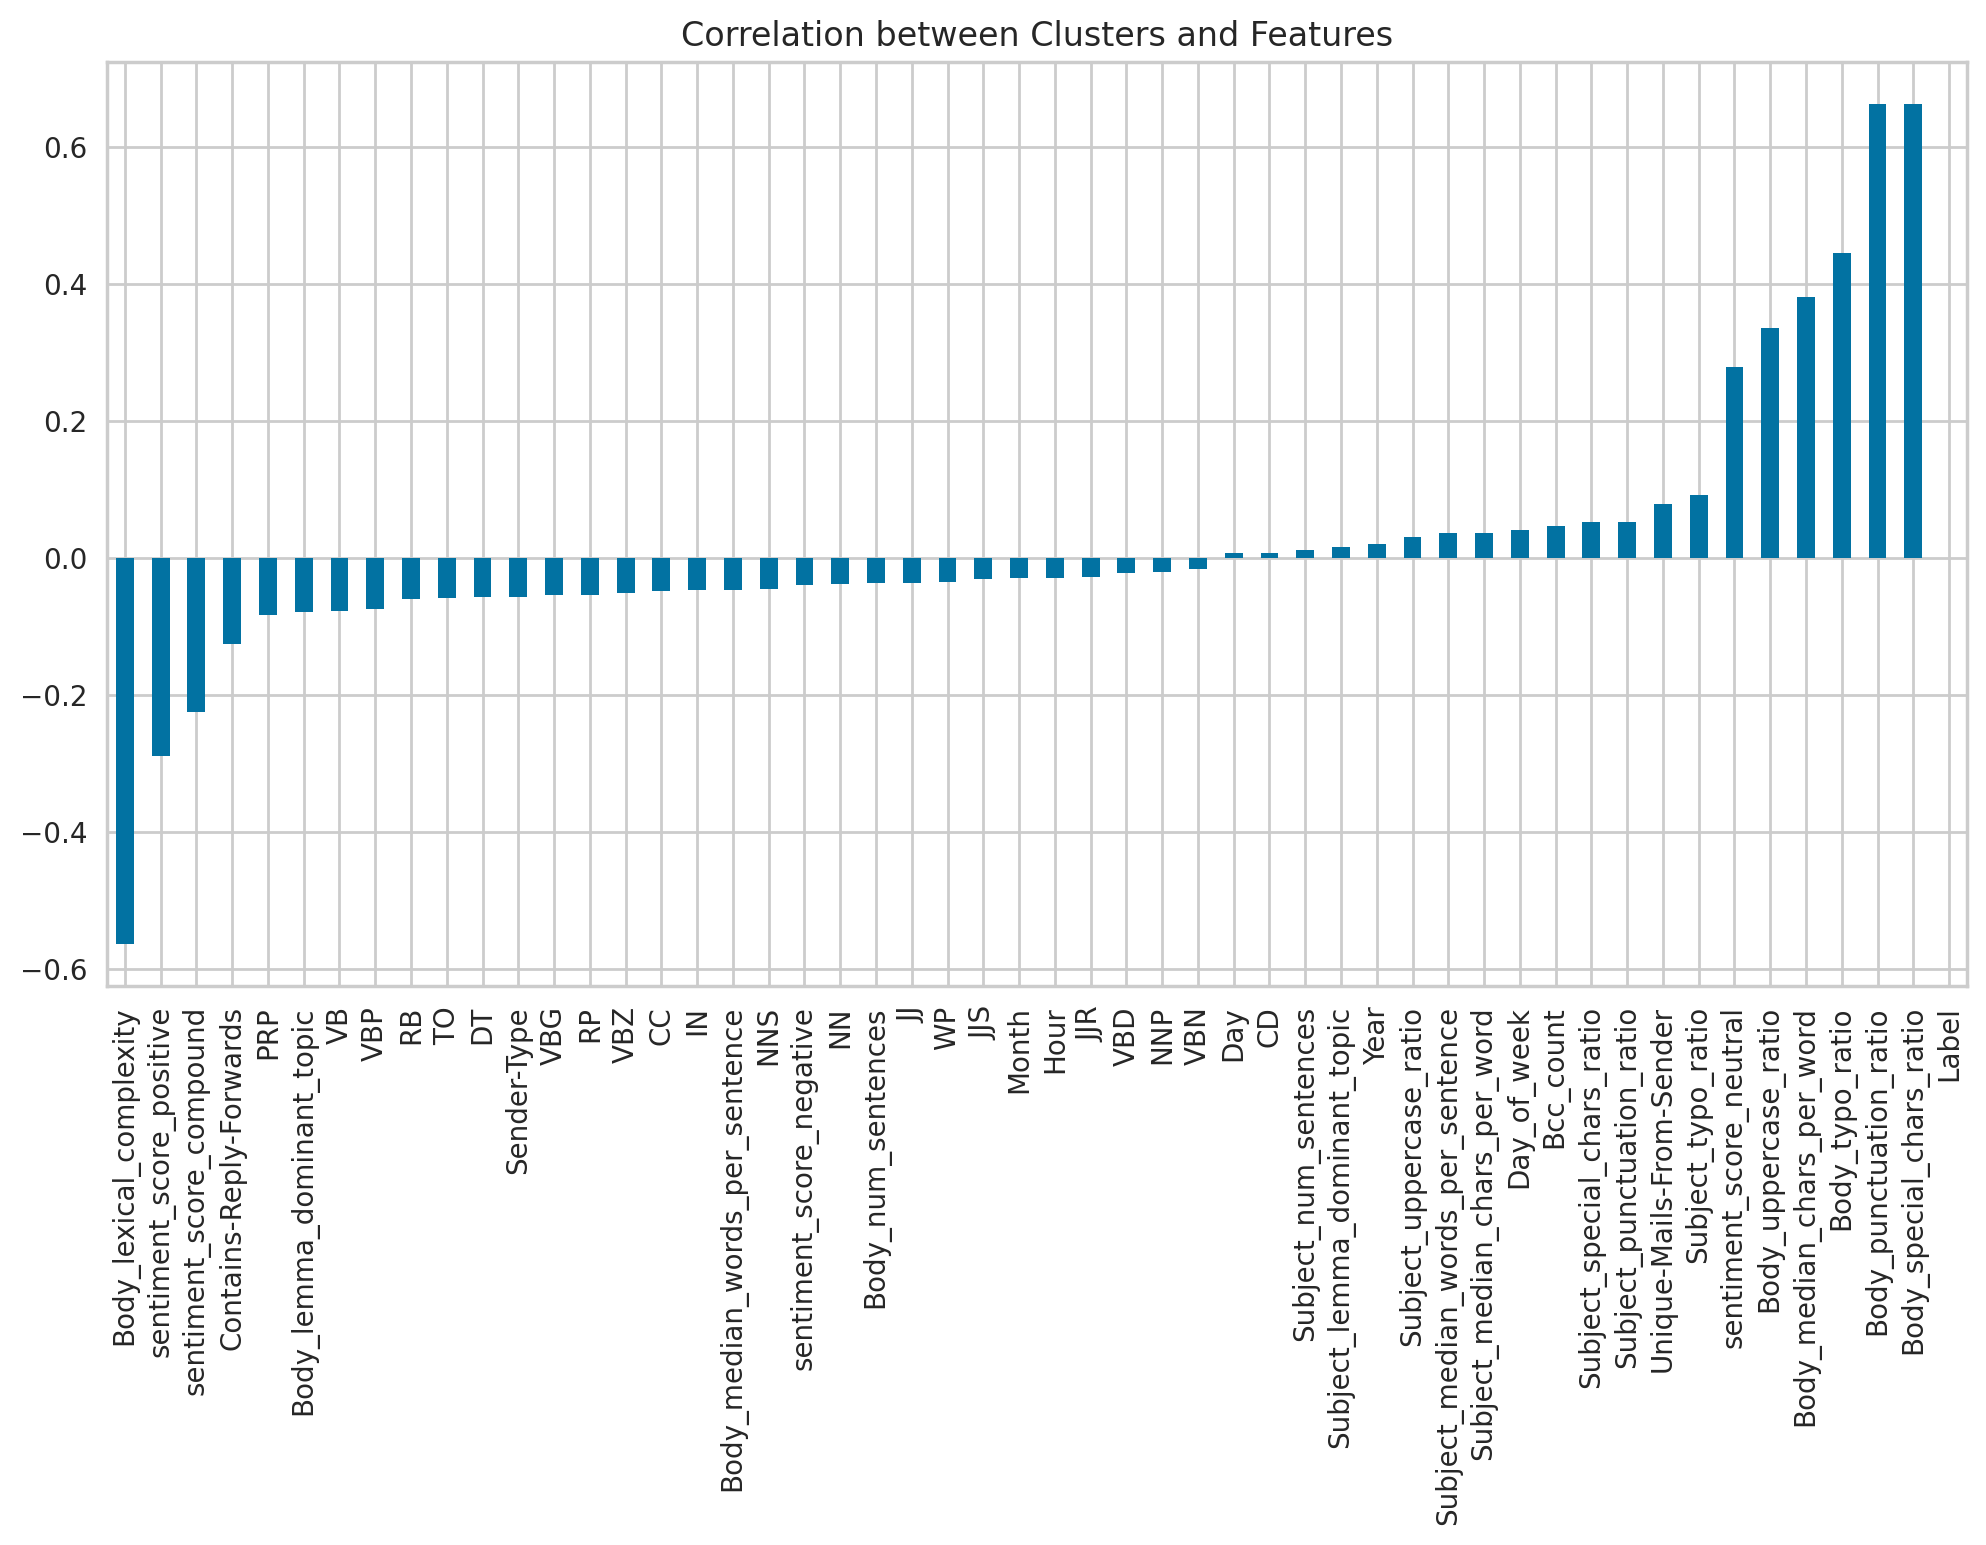

In [102]:
plt.figure(figsize=(12,6),dpi=200)
df_label_0.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

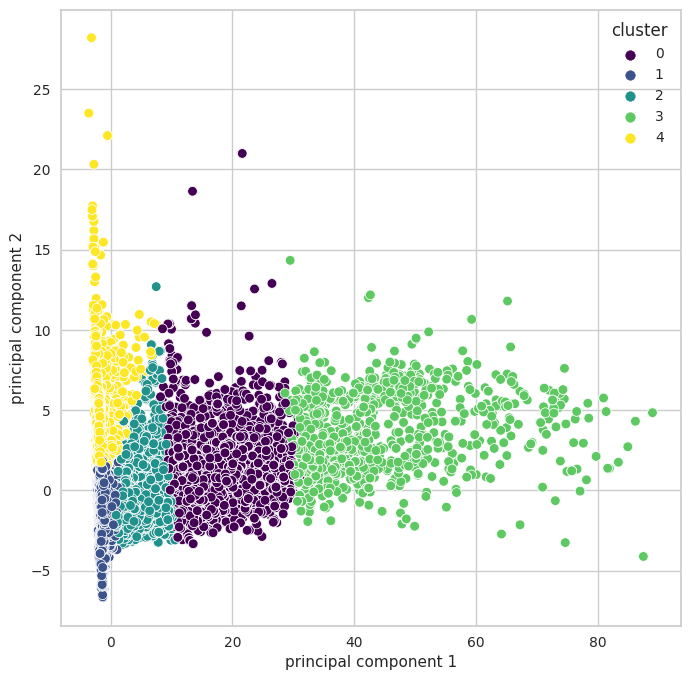

In [103]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled_label_0)

# Create a DataFrame with the two components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Concatenate the clusters labels to the DataFrame
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':k_means_model.labels_})], axis = 1)

# Plot the clusters
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf, palette="viridis")
plt.show()


## Hierarchical Clustering

In [104]:
df_label_0_2 = pd.read_csv("../input/enron-clean/enron_clean_V2.csv")

In [105]:
df_label_0_2 = df_label_0_2[df_label_0_2['Label'] == 0]

In [106]:
df_label_0_2 = df_label_0_2.drop(["Subject_lemma", "Body_lemma"],axis=1)

In [107]:
df_label_0_2.head()

Year  Month  Day  Hour  Day_of_week  sentiment_score_compound  sentiment_score_positive  sentiment_score_neutral  sentiment_score_negative  Sender-Type  Unique-Mails-From-Sender  Contains-Reply-Forwards  Subject_num_sentences  Subject_median_chars_per_word  Subject_median_words_per_sentence  Subject_uppercase_ratio  Subject_punctuation_ratio  Subject_typo_ratio  Subject_special_chars_ratio  Body_num_sentences  Body_median_chars_per_word  Body_median_words_per_sentence  Body_uppercase_ratio  Body_punctuation_ratio  Body_typo_ratio  Body_special_chars_ratio  Bcc_count  Label  Body_lexical_complexity  Body_lemma_dominant_topic  Subject_lemma_dominant_topic  VBZ  VBD  CD  PRP  VB  VBN  RB  TO  RP  VBG  NNP  VBP  JJ  NNS  IN  DT  CC  JJS  WP  NN  JJR
0  2000     11   16    17            3                    0.9616                     0.226                    0.708                     0.066            0                  0.003281                        0                    0.0                       0.063158                           0.027027                 0.166667                   0.000000            0.000000                     0.000000            0.017204                    0.052632                        0.012067              0.028716                0.055743         0.036036                  0.055743        0.0      0                 0.923077                         11                             5    1    3   2   10   7    2   9   4   2    1    9    8   8    1  12   8   2    1   1  13    0
1  2000     12    8    13            4                    0.5940                     0.074                    0.926                     0.000            0                  0.000729                        0                    0.0                       0.089474                           0.054054                 0.000000                   0.055556            0.000000                     0.055556            0.004301                    0.052632                        0.018996              0.000000                0.030508         0.140351                  0.030508        0.0      0                 0.947368                          3                            11    0    1   1    1   4    0   4   1   0    1    0    5   8    3   3   4   2    0   0  15    1
2  2001      5   15    16            1                   -0.3923                     0.036                    0.918                     0.045            0                  0.000547                        0                    0.0                       0.042105                           0.135135                 0.172414                   0.000000            0.200000                     0.000000            0.004301                    0.052632                        0.062007              0.074792                0.042475         0.088889                  0.042475        0.0      0                 0.775862                          4                             9    1    7  21    6   7    5   4   5   0    8   43    4   6   10   9   9   1    0   1  26    0
3  2000     12   12     7            1                   -0.4767                     0.000                    0.829                     0.171            0                  0.001641                        1                    0.0                       0.084211                           0.216216                 0.149254                   0.044776            0.111111                     0.044776            0.006452                    0.111842                        0.004301              0.076923                0.117949         0.310345                  0.117949        0.0      0                 0.617647                          2                             5    0    1   1    0   1    1   0   1   0    0   10    0   2    0   1   0   0    0   0  10    0
4  2001      5   15     6            1                   -0.0772                     0.058                    0.893                     0.050            0                  0.064163                        0   

In [108]:
# Reducing size of dataset
df_label_0_2 = df_label_0_2.sample(frac=0.1, random_state=42) 

In [109]:
df_label_0_2.Label.value_counts()

Label
0    43086
Name: count, dtype: int64

In [110]:
scaler = MinMaxScaler()
df_scaled_label_0_2 = scaler.fit_transform(df_label_0_2)
df_scaled_label_0_2[:5]

array([[5.00000000e-01, 9.09090909e-01, 4.00000000e-01, 6.08695652e-01,
        0.00000000e+00, 4.99974999e-01, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 3.06234050e-01, 1.00000000e+00,
        0.00000000e+00, 3.79746835e-02, 2.94117647e-02, 3.33333333e-01,
        3.33333333e-01, 0.00000000e+00, 3.33333333e-01, 2.99401198e-03,
        5.92105263e-02, 6.50406504e-03, 1.72413793e-01, 1.64203612e-01,
        7.14285714e-02, 1.64203612e-01, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 5.45454545e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.94550810e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.28081972e-03, 0.00000000e+00, 1.88323917e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.23214286e-03, 0.00000000e+00],
       [5.25000000e-01, 4.54545455e-01, 0.00000000e+00, 9.13043

In [111]:
df_scaled_label_0_2  = pd.DataFrame(df_scaled_label_0_2,columns=df_label_0_2.columns)

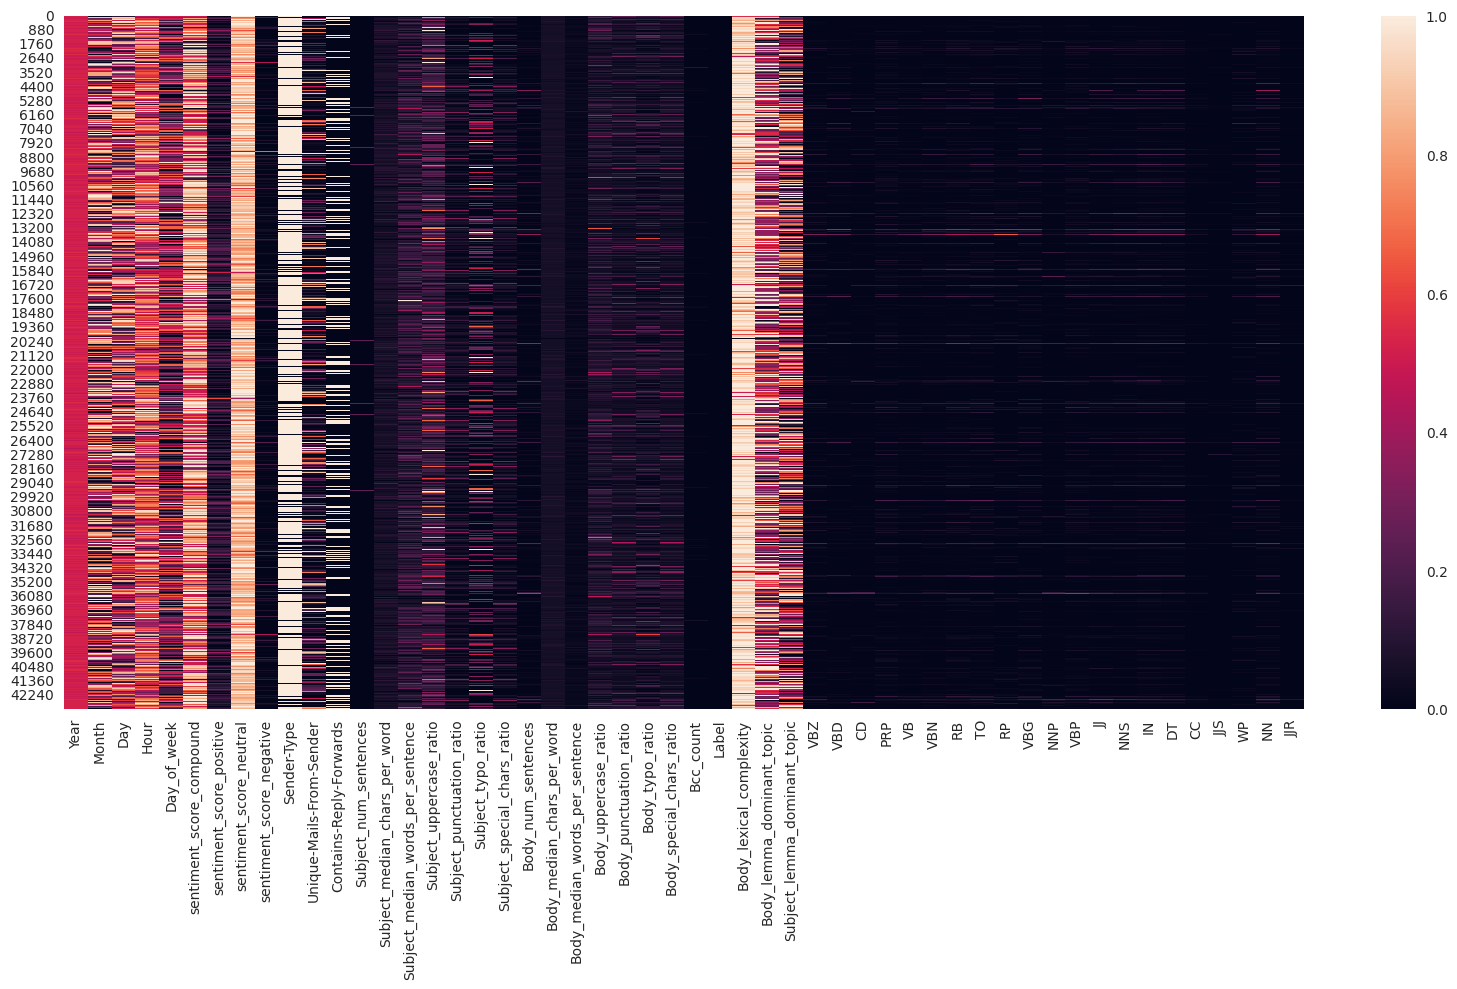

In [112]:
plt.figure(figsize=(20,9))
sns.heatmap(df_scaled_label_0_2)
plt.show()

<Figure size 2000x900 with 0 Axes>

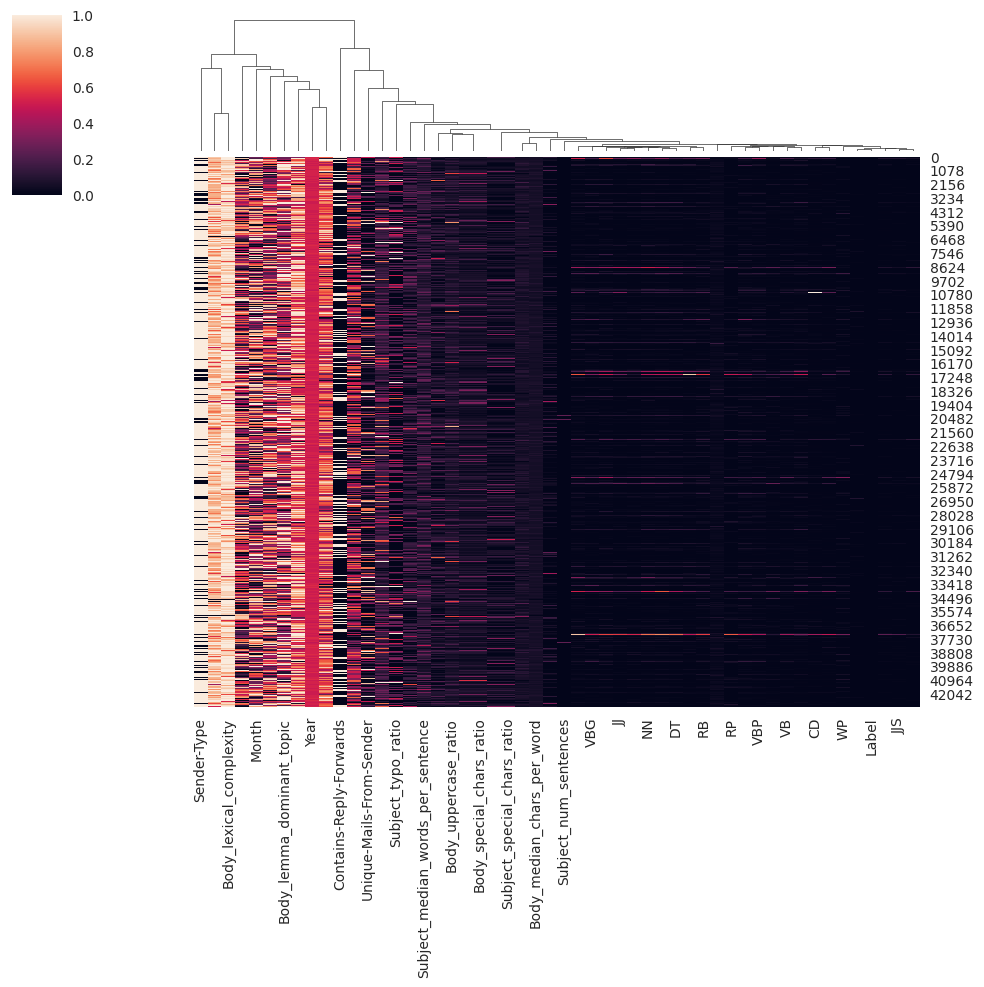

In [113]:
plt.figure(figsize=(20,9))
sns.clustermap(df_scaled_label_0_2,row_cluster=False)
plt.show()

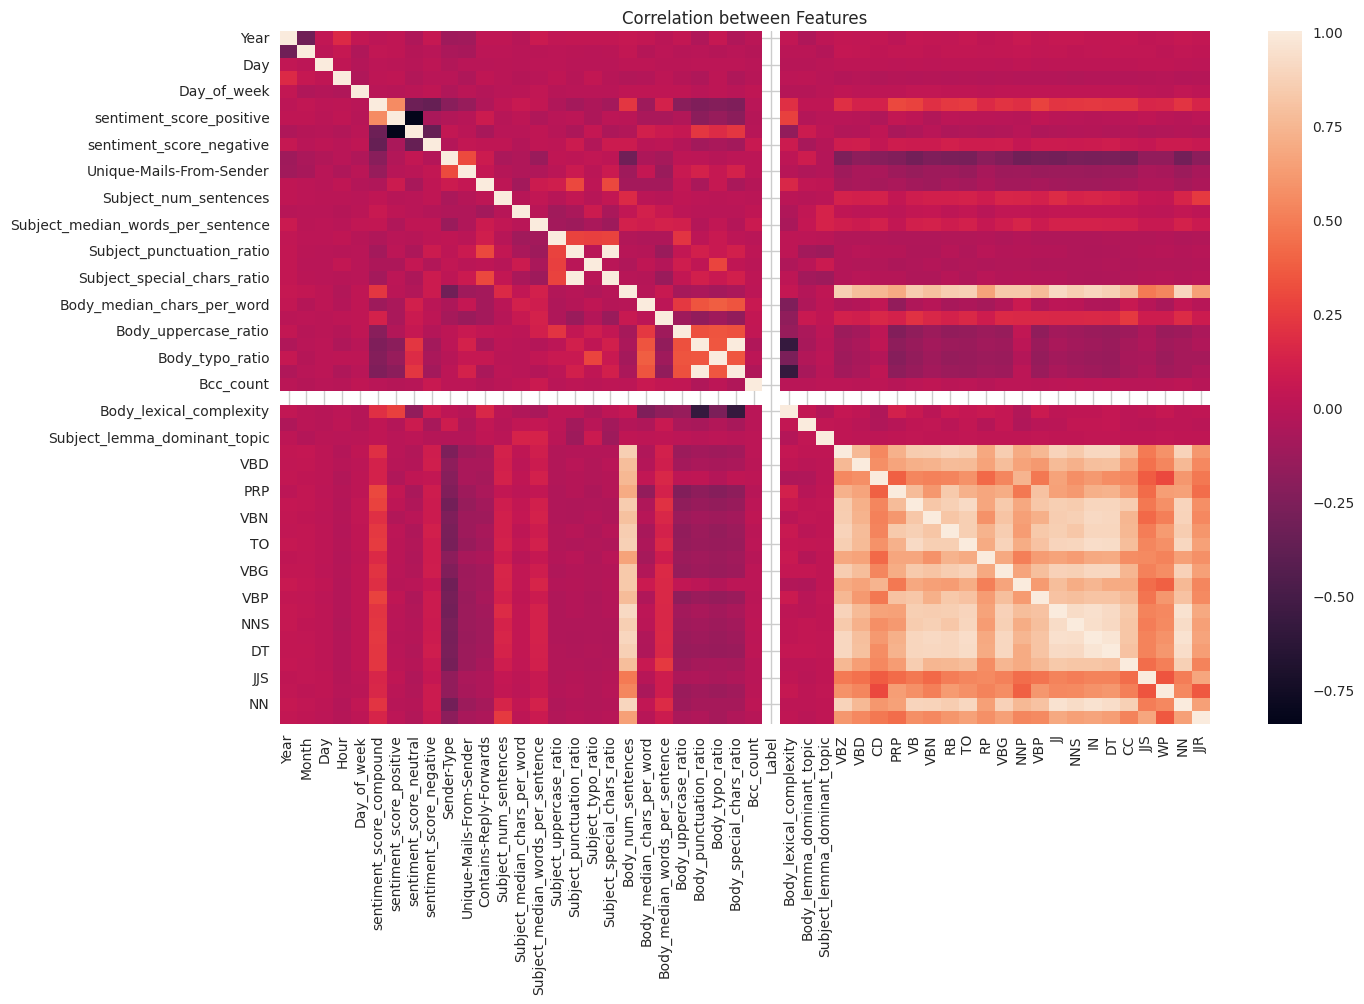

In [114]:
plt.figure(figsize=(15,9))
sns.heatmap(df_scaled_label_0_2.corr())
plt.title("Correlation between Features")
plt.show()

In [115]:
hier_model = AgglomerativeClustering(n_clusters=5,affinity="euclidean") #distance_threshold is also important.

In [116]:
cluster_labels = hier_model.fit_predict(df_scaled_label_0_2)

In [117]:
cluster_labels[:20]

array([1, 0, 3, 2, 4, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2])

In [118]:
df_scaled_label_0_2.shape

(43086, 52)

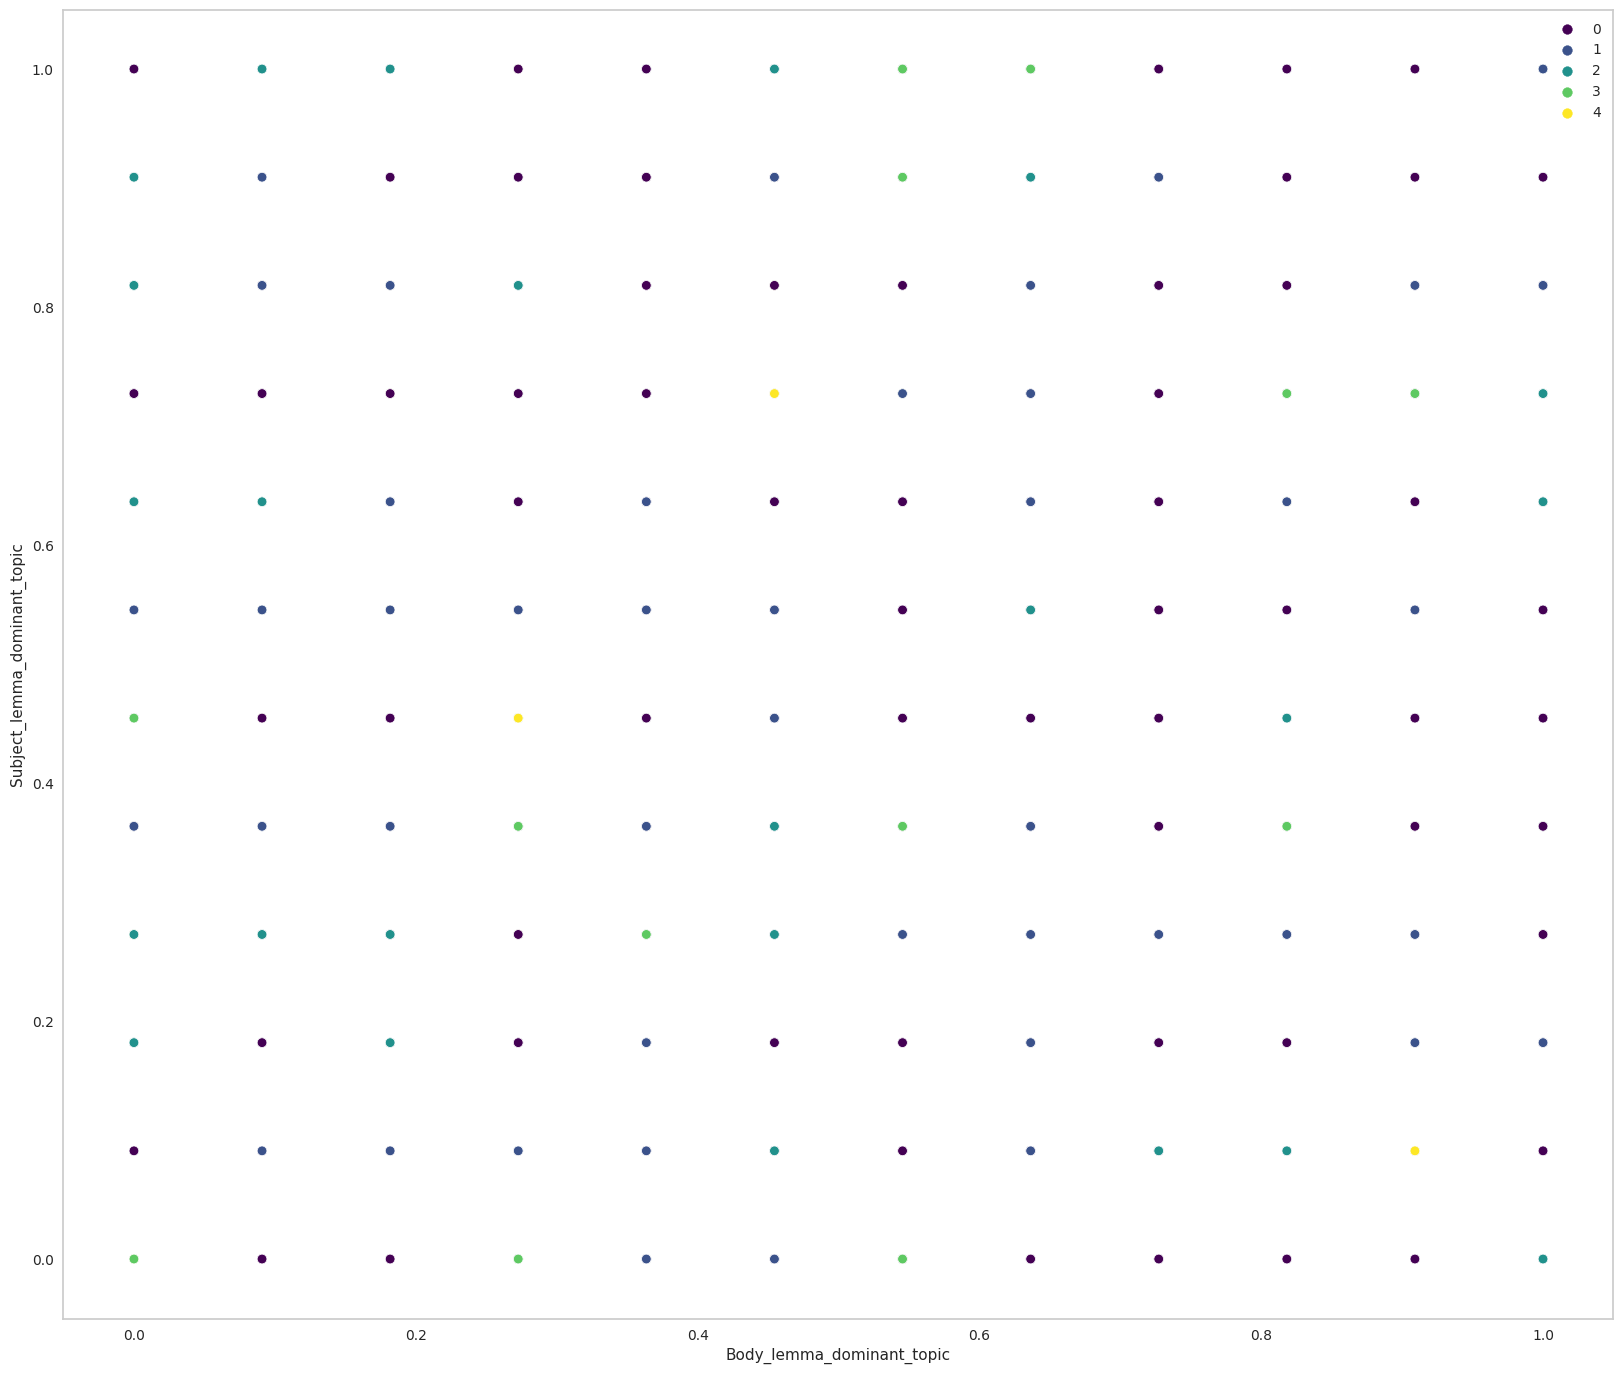

In [119]:
plt.figure(figsize=(20,17))
sns.scatterplot(df_scaled_label_0_2,x="Body_lemma_dominant_topic",y="Subject_lemma_dominant_topic",hue=cluster_labels,palette="viridis")
plt.grid(False)

In [120]:
linkage_matrix = hierarchy.linkage(hier_model.children_)
linkage_matrix

array([[6.64900000e+03, 1.68150000e+04, 1.41421356e+00, 2.00000000e+00],
       [2.76480000e+04, 3.06930000e+04, 1.41421356e+00, 2.00000000e+00],
       [3.42300000e+04, 3.77380000e+04, 1.41421356e+00, 2.00000000e+00],
       ...,
       [4.21970000e+04, 8.61650000e+04, 3.24333470e+03, 4.30820000e+04],
       [8.59770000e+04, 8.61660000e+04, 3.47745654e+03, 4.30840000e+04],
       [4.28570000e+04, 8.61670000e+04, 3.60465380e+03, 4.30850000e+04]])

In [121]:
linkage_df = pd.DataFrame(linkage_matrix,columns=["First Point","Second Point","Distance Between Points","How many points are there in the cluster?"])
linkage_df.head()

First Point  Second Point  Distance Between Points  How many points are there in the cluster?
0       6649.0       16815.0                 1.414214                                        2.0
1      27648.0       30693.0                 1.414214                                        2.0
2      34230.0       37738.0                 1.414214                                        2.0
3      42028.0       42177.0                 1.414214                                        2.0
4      43010.0       43024.0                 1.414214                                        2.0

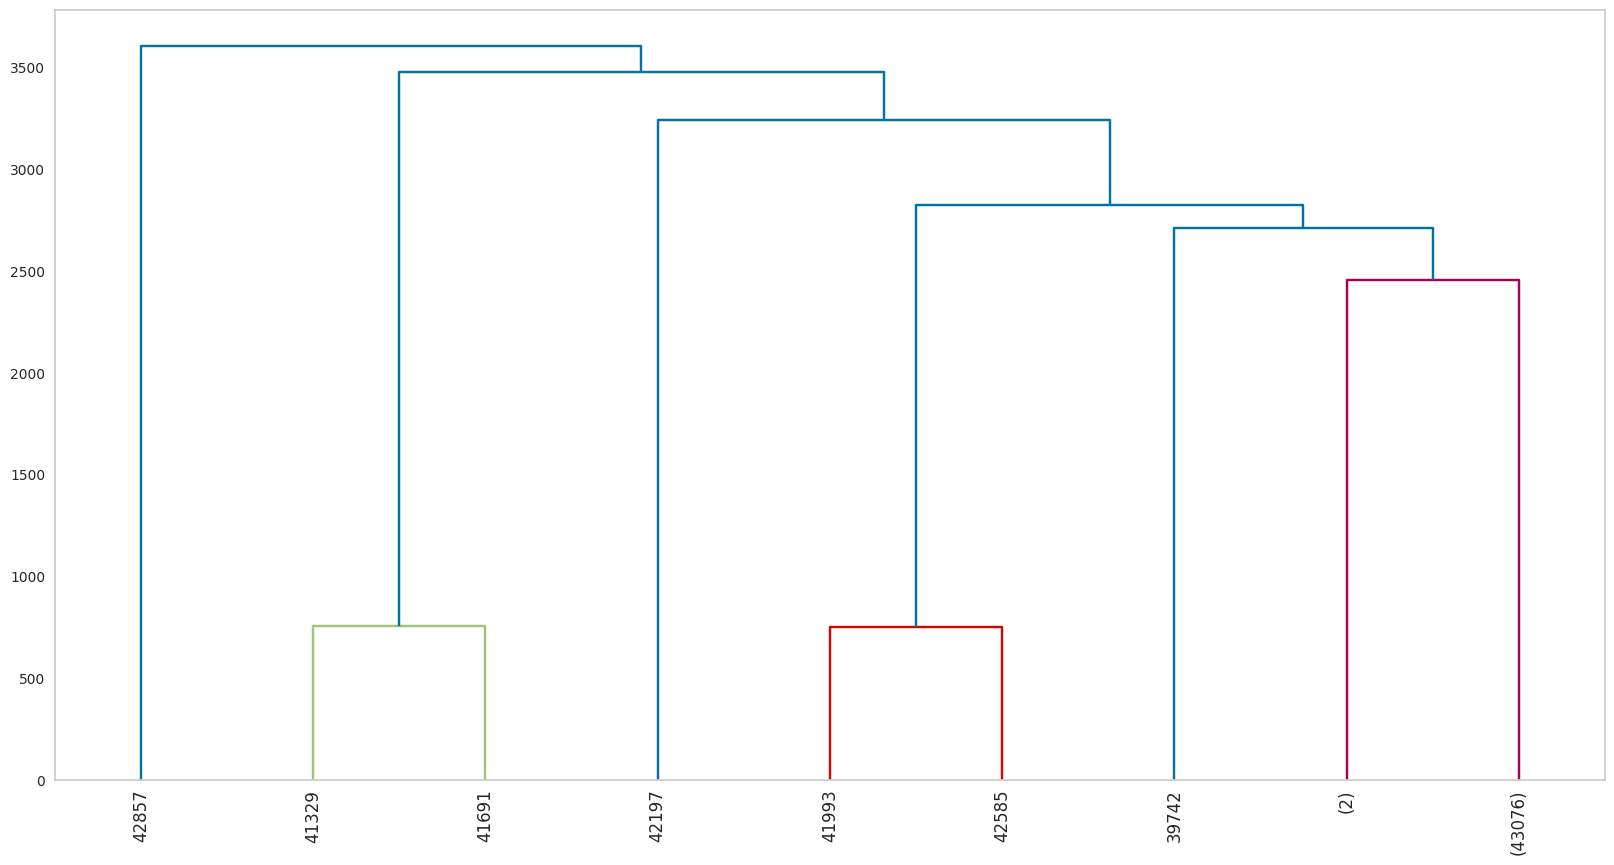

In [122]:
plt.figure(figsize=(20,10))
dendrogram = hierarchy.dendrogram(linkage_matrix,truncate_mode="level",p=5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()